<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 52px">

# General Assembly Data Science Fall 2021

## Final Project, Part 3: Technical Notebook
## Making Predictions about the Popularity of Rides at Walt Disney World

#### <br>Student: Christopher Doughty
#### Date: Oct. 12, 2021

---
### Assignment Instructions

Final Project, Part 3: Technical Notebook:

Build and document a working model, prototype, recommendation, or solution.

Develop a prototype model or process to successfully resolve the business problem you've chosen. Document your work in a technical notebook.

Build upon your EDA. Demonstrate your approach logically, including all relevant code and data. Polish your notebook for other audiences by cleanly formatting sections, headers, and descriptions in Markdown. Comment your code.

Requirements:
<br>•	A detailed Jupyter Notebook with a summary of your analysis, approach, and evaluation metrics.
<br>•	Clearly formatted structure with section headings and Markdown descriptions.
<br>•	Comments explaining your code.
<br>•	Note: Here are some things to consider in your notebook: sample size, correlations, feature importance, unexplained variance or outliers, variable selection, imbalanced dataset (if classification), and any relationships between your target and independent variables.

Submission:
<br>•	Submit your link to your GitHub submission repo in Google Classroom.

---
### Project Overview

**Exploratory Questions:**
<br>•	Are there certain attributes that make a ride at Walt Disney World more or less appealing?
<br>•	Could we make an algorithm that would predict the popularity of a ride?

**Objectives:** 
<br>•	Determine if there are any ride attributes that are likely to make an attraction more or less appealing.
<br>•	Create a model that can accurately predict the popularity (rating) of a ride.

**Data Sets:** 
<br>•	Walt Disney World Ride Data from data.world:
<br>https://data.world/lynne588/walt-disney-world-ride-data
<br>•	Individual review data scraped from TripAdvisor for each of the attractions in the WDW Ride Data:
<br>https://www.tripadvisor.com/Attractions-g34515-Activities-a_allAttractions.true-Orlando_Florida.html

**Libraries:** 
<br>• Pandas
<br>• Numpy
<br>• Sci-kit learn
<br>• Matplotlib
<br>• Seaborn

**Techniques Used:** 
<br>• Linear Regression
<br>• One Hot Encoding
<br>• Standard Scaler (standardization)
<br>• Lasso and Ridge Regressions (regularization)
<br>• Grid Search CV
<br>• Logistic Regression
<br>• Confusion Matrices
<br>• K Nearest Neighbors
<br>• Random Forests
<br>• Gradient Boosting (regression and classification)
<br>• Natural Language Processing

---
## Exploratory Data Analysis

#### Import the tools we'll need for our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read 'wdw_ride_data.csv' and store it in a DataFrame named rides.

Data Source: https://data.world/lynne588/walt-disney-world-ride-data

In [2]:
rides = pd.read_excel('./data/wdw_ride_info.xlsx')
rides.head()

,Ride,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,...,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,...,Yes,Yes,32,1.5,2018-06-30,1197,3.277207,3 years 3 months 11 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.5,1995-02-25,9723,26.620123,26 years 7 months 14 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,...,Yes,Yes,44,5.0,2017-05-27,1596,4.369610,4 years 4 months 14 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,...,Yes,Yes,40,3.5,1980-09-23,14991,41.043121,41 years 0 months 15 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,4.0,1998-10-07,8403,23.006160,23 years 0 months 2 days,32.0,4.5


### Do some clean up to make analysis easier.

#### Make each column lowercase.

In [3]:
rides.columns

Index(['Ride', 'Park_location', 'Park_area', 'Ride_type_all',
       'Ride_type_thrill', 'Ride_type_spinning', 'Ride_type_slow',
       'Ride_type_small_drops', 'Ride_type_big_drops', 'Ride_type_dark',
       'Ride_type_scary', 'Ride_type_water', 'Fast_pass', 'Classic',
       'Age_interest_all', 'Age_interest_preschoolers', 'Age_interest_kids',
       'Age_interest_tweens', 'Age_interest_teens', 'Age_interest_adults',
       'Height_req_inches', 'Ride_duration_min', 'Open_date',
       'Age_of_ride_days', 'Age_of_ride_years', 'Age_of_ride_total', 'TL_rank',
       'TA_Stars'],
      dtype='object')

In [4]:
rides.rename(columns=str.lower, inplace = True)

In [5]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_all',
       'ride_type_thrill', 'ride_type_spinning', 'ride_type_slow',
       'ride_type_small_drops', 'ride_type_big_drops', 'ride_type_dark',
       'ride_type_scary', 'ride_type_water', 'fast_pass', 'classic',
       'age_interest_all', 'age_interest_preschoolers', 'age_interest_kids',
       'age_interest_tweens', 'age_interest_teens', 'age_interest_adults',
       'height_req_inches', 'ride_duration_min', 'open_date',
       'age_of_ride_days', 'age_of_ride_years', 'age_of_ride_total', 'tl_rank',
       'ta_stars'],
      dtype='object')

### Explore basic dataset attributes.

#### Check the number of rows and columns.

In [6]:
print('columns:', len(rides.columns))
print('rows:', len(rides))

columns: 28
rows: 46


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ride                       46 non-null     object        
 1   park_location              46 non-null     object        
 2   park_area                  46 non-null     object        
 3   ride_type_all              46 non-null     object        
 4   ride_type_thrill           46 non-null     object        
 5   ride_type_spinning         46 non-null     object        
 6   ride_type_slow             46 non-null     object        
 7   ride_type_small_drops      46 non-null     object        
 8   ride_type_big_drops        46 non-null     object        
 9   ride_type_dark             46 non-null     object        
 10  ride_type_scary            46 non-null     object        
 11  ride_type_water            46 non-null     object        
 12  fast_pass 

In [8]:
rides.describe()

,height_req_inches,ride_duration_min,age_of_ride_days,age_of_ride_years,tl_rank,ta_stars
count,46.000000,46.000000,46.000000,46.000000,44.000000,44.000000
mean,16.543478,6.125000,10507.478261,28.767908,24.818182,4.215909
std,20.128152,5.119611,5867.381433,16.064015,15.432181,0.449777
min,0.000000,1.000000,1197.000000,3.277207,1.000000,3.000000
25%,0.000000,2.500000,6704.750000,18.356605,11.750000,4.000000
50%,0.000000,4.875000,8571.000000,23.466119,23.500000,4.250000
75%,40.000000,8.375000,17069.000000,46.732375,36.500000,4.500000
max,48.000000,20.750000,18271.000000,50.023272,53.000000,5.000000


#### Since the DataFrame isn't super large, let's look at the whole thing.

In [9]:
rides

,ride,park_location,park_area,ride_type_all,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,...,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,age_of_ride_total,tl_rank,ta_stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,...,Yes,Yes,32,1.50,2018-06-30,1197,3.277207,3 years 3 months 11 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,1995-02-25,9723,26.620123,26 years 7 months 14 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,...,Yes,Yes,44,5.00,2017-05-27,1596,4.369610,4 years 4 months 14 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,...,Yes,Yes,40,3.50,1980-09-23,14991,41.043121,41 years 0 months 15 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,4.00,1998-10-07,8403,23.006160,23 years 0 months 2 days,32.0,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",Yes,No,No,Yes,No,Yes,...,Yes,Yes,40,3.25,1998-04-22,8571,23.466119,23 years 5 months 19 days,24.0,4.0
6,Dumbo the Flying Elephant,MK,Fantasyland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,1971-10-01,18271,50.023272,50 years 0 months 8 days,29.0,4.5
7,Expedition Everest,AK,Asia,"thrill, big drops, dark",Yes,No,No,No,Yes,Yes,...,Yes,Yes,44,2.75,2006-04-07,5664,15.507187,15 years 6 months 4 days,1.0,5.0
8,Frozen Ever After,EC,World Showcase,"slow, small drops, dark",No,No,Yes,Yes,No,Yes,...,Yes,Yes,0,5.00,2016-06-21,1936,5.300479,5 years 3 months 19 days,27.0,4.0
9,Gran Fiesta Tour Starring The Three Caballeros,EC,World Showcase,slow,No,No,Yes,No,No,No,...,Yes,Yes,0,8.00,2007-04-02,5304,14.521561,14 years 6 months 9 days,47.0,4.0


#### Check the data type of each column.

In [10]:
rides.dtypes

ride                                 object
park_location                        object
park_area                            object
ride_type_all                        object
ride_type_thrill                     object
ride_type_spinning                   object
ride_type_slow                       object
ride_type_small_drops                object
ride_type_big_drops                  object
ride_type_dark                       object
ride_type_scary                      object
ride_type_water                      object
fast_pass                            object
classic                              object
age_interest_all                     object
age_interest_preschoolers            object
age_interest_kids                    object
age_interest_tweens                  object
age_interest_teens                   object
age_interest_adults                  object
height_req_inches                     int64
ride_duration_min                   float64
open_date                    dat

In [11]:
rides['park_location'].dtype

dtype('O')

In [12]:
rides['fast_pass'].dtype

dtype('O')

In [13]:
rides['ride_duration_min'].dtype

dtype('float64')

In [14]:
rides['ta_stars'].dtype

dtype('float64')

### Let's do some more data cleaning.

#### Handle any missing values.

In [15]:
rides.isna().sum()

ride                         0
park_location                0
park_area                    0
ride_type_all                0
ride_type_thrill             0
ride_type_spinning           0
ride_type_slow               0
ride_type_small_drops        0
ride_type_big_drops          0
ride_type_dark               0
ride_type_scary              0
ride_type_water              0
fast_pass                    0
classic                      0
age_interest_all             0
age_interest_preschoolers    0
age_interest_kids            0
age_interest_tweens          0
age_interest_teens           0
age_interest_adults          0
height_req_inches            0
ride_duration_min            0
open_date                    0
age_of_ride_days             0
age_of_ride_years            0
age_of_ride_total            0
tl_rank                      2
ta_stars                     2
dtype: int64

In [16]:
null_data = rides[rides.isnull().any(axis=1)]
null_data

,ride,park_location,park_area,ride_type_all,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,...,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,age_of_ride_total,tl_rank,ta_stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,...,Yes,Yes,32,1.5,2018-06-30,1197,3.277207,3 years 3 months 11 days,31.0,NaN
18,Main Street Vehicles,MK,Main Street USA,slow,No,No,Yes,No,No,No,...,Yes,Yes,0,3.0,1971-10-01,18271,50.023272,50 years 0 months 8 days,NaN,4.5
27,Slinky Dog Dash,HS,Toy Story Land,"thrill, small drops",Yes,No,No,Yes,No,No,...,Yes,Yes,38,2.0,2018-06-30,1197,3.277207,3 years 3 months 11 days,14.0,NaN
45,Wildlife Express Train,AK,Africa,slow,No,No,Yes,No,No,No,...,Yes,Yes,0,12.0,1998-04-22,8571,23.466119,23 years 5 months 19 days,NaN,3.5


Source: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values

#### Update info on average ride ratings.

At the time the data set was compiled (October 23, 2019), Toy Story Land was still new, so those rides didn't have any reviews.

One of them does have reviews now (Slinky Dog Dash), so I could add a rating for it, but since that would be the only current rating, it would be out of sync with the rest of the ratings. For the one ride that still does not have its own review page (Alien Swirling Saucers), that ride should be deleted since no rating information is available.

Since there aren't too many rides though, I went into each ride's page in order to update the rating info (links below).

https://www.tripadvisor.com/Attraction_Review-g34515-d8563101-Reviews-Astro_Orbiter-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d14145257-Reviews-Avatar_Flight_of_Passage-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563103-Reviews-Big_Thunder_Mountain_Railroad-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563105-Reviews-Buzz_Lightyear_s_Space_Ranger_Spin-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8562272-Reviews-Dinosaur-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563118-Reviews-Dumbo_the_Flying_Elephant-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563259-Reviews-Expedition_Everest_Legend_of_the_Forbidden_Mountain-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d13535055-Reviews-Frozen_Ever_After-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563192-Reviews-Gran_Fiesta_Tour_Starring_The_Three_Caballeros-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8562260-Reviews-Haunted_Mansion-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563140-Reviews-It_s_a_Small_World-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563206-Reviews-Journey_Into_Imagination_with_Figment-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563123-Reviews-Jungle_Cruise-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563270-Reviews-Kali_River_Rapids-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563269-Reviews-Kilimanjaro_Safaris-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563210-Reviews-Living_with_the_Land-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563124-Reviews-Mad_Tea_Party-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563127-Reviews-Main_Street_Vehicles-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563212-Reviews-Mission_SPACE-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d14142516-Reviews-Na_vi_River_Journey-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563131-Reviews-Peter_Pan_s_Flight-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563134-Reviews-Pirates_of_the_Caribbean-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563273-Reviews-Primeval_Whirl-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563137-Reviews-Prince_Charming_Regal_Carrousel-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563302-Reviews-Rock_n_Roller_Coaster_Starring_Aerosmith-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563138-Reviews-Seven_Dwarfs_Mine_Train-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d17523143-Reviews-Slinky_Dog_Dash-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563234-Reviews-Soarin-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563169-Reviews-Space_Mountain-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563236-Reviews-Spaceship_Earth-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563157-Reviews-Splash_Mountain-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563504-Reviews-Star_Tours_The_Adventures_Continue-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563231-Reviews-Test_Track_Presented_by_Chevrolet-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563116-Reviews-The_Barnstormer-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8562267-Reviews-The_Magic_Carpets_of_Aladdin-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563128-Reviews-The_Many_Adventures_of_Winnie_the_Pooh-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563303-Reviews-The_Twilight_Zone_Tower_of_Terror-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563164-Reviews-Tomorrowland_Speedway-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563163-Reviews-Tomorrowland_Transit_Authority_PeopleMover-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563492-Reviews-Toy_Story_Midway_Mania-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563278-Reviews-TriceraTop_Spin-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563167-Reviews-Under_the_Sea_Journey_of_The_Little_Mermaid-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563172-Reviews-Walt_Disney_World_Railroad-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563168-Reviews-Walt_Disney_s_Carousel_of_Progress-Orlando_Florida.html
<br>https://www.tripadvisor.com/Attraction_Review-g34515-d8563283-Reviews-Wildlife_Express_Train-Orlando_Florida.html

#### Delete Alien Swirling Saucers

In [17]:
rides.head(2)

,ride,park_location,park_area,ride_type_all,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,...,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,age_of_ride_total,tl_rank,ta_stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,...,Yes,Yes,32,1.5,2018-06-30,1197,3.277207,3 years 3 months 11 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.5,1995-02-25,9723,26.620123,26 years 7 months 14 days,43.0,3.5


In [18]:
rides = rides.drop(rides.index[0])

In [19]:
rides.head(2)

,ride,park_location,park_area,ride_type_all,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,...,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,age_of_ride_total,tl_rank,ta_stars
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.5,1995-02-25,9723,26.620123,26 years 7 months 14 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,...,Yes,Yes,44,5.0,2017-05-27,1596,4.369610,4 years 4 months 14 days,9.0,5.0


#### Update ratings for rides where ratings differ from original data set.

**Check the full table again now that we've deleted the first ride so we know we're modifying the correct values.**

In [20]:
rides

,ride,park_location,park_area,ride_type_all,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,...,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,age_of_ride_total,tl_rank,ta_stars
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,1995-02-25,9723,26.620123,26 years 7 months 14 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,...,Yes,Yes,44,5.00,2017-05-27,1596,4.369610,4 years 4 months 14 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,...,Yes,Yes,40,3.50,1980-09-23,14991,41.043121,41 years 0 months 15 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,4.00,1998-10-07,8403,23.006160,23 years 0 months 2 days,32.0,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",Yes,No,No,Yes,No,Yes,...,Yes,Yes,40,3.25,1998-04-22,8571,23.466119,23 years 5 months 19 days,24.0,4.0
6,Dumbo the Flying Elephant,MK,Fantasyland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,1971-10-01,18271,50.023272,50 years 0 months 8 days,29.0,4.5
7,Expedition Everest,AK,Asia,"thrill, big drops, dark",Yes,No,No,No,Yes,Yes,...,Yes,Yes,44,2.75,2006-04-07,5664,15.507187,15 years 6 months 4 days,1.0,5.0
8,Frozen Ever After,EC,World Showcase,"slow, small drops, dark",No,No,Yes,Yes,No,Yes,...,Yes,Yes,0,5.00,2016-06-21,1936,5.300479,5 years 3 months 19 days,27.0,4.0
9,Gran Fiesta Tour Starring The Three Caballeros,EC,World Showcase,slow,No,No,Yes,No,No,No,...,Yes,Yes,0,8.00,2007-04-02,5304,14.521561,14 years 6 months 9 days,47.0,4.0
10,Haunted Mansion,MK,Liberty Square,"slow, dark",No,No,Yes,No,No,Yes,...,Yes,Yes,0,7.50,1971-10-01,18271,50.023272,50 years 0 months 8 days,2.0,4.5


**Update Journey into Imagination from 3 to 3.5**

In [21]:
rides.at[12, 'ta_stars']

3.0

In [22]:
rides.at[12, 'ta_stars'] = 3.5

In [23]:
rides.at[12, 'ta_stars']

3.5

Source: https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/

**Update Na'vi River Journey from 4 to 3.5**

In [24]:
rides.at[20, 'ta_stars']

4.0

In [25]:
rides.at[20, 'ta_stars'] = 3.5

In [26]:
rides.at[20, 'ta_stars']

3.5

**Update Slinky Dog Dash from NA to 4.5**

In [27]:
rides.at[27, 'ta_stars']

nan

In [28]:
rides.at[27, 'ta_stars'] = 4.5

In [29]:
rides.at[27, 'ta_stars']

4.5

**Update Spaceship Earth from 4.5 to 4**

In [30]:
rides.at[30, 'ta_stars']

4.5

In [31]:
rides.at[30, 'ta_stars'] = 4

In [32]:
rides.at[30, 'ta_stars']

4.0

#### Find out what to do with those attractions that were not ranked.

Since the Main Street Vehicles and Wildlife Express Train have a star rating from TripAdvisor, we should keep them in the data set, even though they weren't ranked.

Since tl_rank field refers to a ranking by Travel & Leisure that is based on an agency's ranking rather than an aggregation of user reviews, let's delete that column so we can focus on the TripAdvisor ratings, as we will be able to examine a breadth of individual user reviews later on and link it with our ride data for analysis of connections between ride attributes and user ratings.

#### Delete the tl_rank column.

In [33]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_all',
       'ride_type_thrill', 'ride_type_spinning', 'ride_type_slow',
       'ride_type_small_drops', 'ride_type_big_drops', 'ride_type_dark',
       'ride_type_scary', 'ride_type_water', 'fast_pass', 'classic',
       'age_interest_all', 'age_interest_preschoolers', 'age_interest_kids',
       'age_interest_tweens', 'age_interest_teens', 'age_interest_adults',
       'height_req_inches', 'ride_duration_min', 'open_date',
       'age_of_ride_days', 'age_of_ride_years', 'age_of_ride_total', 'tl_rank',
       'ta_stars'],
      dtype='object')

In [34]:
rides.drop('tl_rank', axis=1, inplace=True)

Source: https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

In [35]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_all',
       'ride_type_thrill', 'ride_type_spinning', 'ride_type_slow',
       'ride_type_small_drops', 'ride_type_big_drops', 'ride_type_dark',
       'ride_type_scary', 'ride_type_water', 'fast_pass', 'classic',
       'age_interest_all', 'age_interest_preschoolers', 'age_interest_kids',
       'age_interest_tweens', 'age_interest_teens', 'age_interest_adults',
       'height_req_inches', 'ride_duration_min', 'open_date',
       'age_of_ride_days', 'age_of_ride_years', 'age_of_ride_total',
       'ta_stars'],
      dtype='object')

#### Delete the ride_type_all column.

Since ride_type_all does not provide any new information not already present in the other ride_type columns, it can be deleted.

It presents in a sequence of strings what the other ride_type columns express through Yes or No Boolean values.

In [36]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_all',
       'ride_type_thrill', 'ride_type_spinning', 'ride_type_slow',
       'ride_type_small_drops', 'ride_type_big_drops', 'ride_type_dark',
       'ride_type_scary', 'ride_type_water', 'fast_pass', 'classic',
       'age_interest_all', 'age_interest_preschoolers', 'age_interest_kids',
       'age_interest_tweens', 'age_interest_teens', 'age_interest_adults',
       'height_req_inches', 'ride_duration_min', 'open_date',
       'age_of_ride_days', 'age_of_ride_years', 'age_of_ride_total',
       'ta_stars'],
      dtype='object')

In [37]:
rides.drop('ride_type_all', axis=1, inplace=True)

In [38]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'age_of_ride_total', 'ta_stars'],
      dtype='object')

#### Delete the age_of_ride_total column.

Since age_of_ride_total does not provide any new information not already present in the other age_of_ride columns and is expressed in a fairly unfriendly format, it can be deleted.

In [39]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'age_of_ride_total', 'ta_stars'],
      dtype='object')

In [40]:
rides.drop('age_of_ride_total', axis=1, inplace=True)

In [41]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'ta_stars'],
      dtype='object')

#### Modify the age_interest_all column.

The age_interest_all column actually does provide unique information in that there is no other column that expresses whether a ride is suitable for all ages.

To give it a clearer purpose, let's turn it into a set of Boolean values, with 'Yes' representing 'all ages' and 'No' for anything else.

This way it will align with how the other ride_type and age_interest columns are structured. 

In [42]:
rides['age_interest_all'].value_counts()

all ages                       28
kids, tweens, teens, adults    16
preschoolers, kids              1
Name: age_interest_all, dtype: int64

In [43]:
rides['age_interest_all'] = rides['age_interest_all'].replace(['all ages', 'kids, tweens, teens, adults', 'preschoolers, kids'], ['Yes', 'No', 'No'])

Source: https://datatofish.com/replace-values-pandas-dataframe/

In [44]:
rides['age_interest_all'].value_counts()

Yes    28
No     17
Name: age_interest_all, dtype: int64

#### Modify the age_of_ride columns.

Since we have the opening date information for each ride, we could use that info to update the age_of_ride columns, but since the rating data is still from 2019, we need to update these age fields to represent the difference between their opening date and today's date (September 20, 2021).

In [45]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [46]:
rides.open_date

1    1995-02-25
2    2017-05-27
3    1980-09-23
4    1998-10-07
5    1998-04-22
6    1971-10-01
7    2006-04-07
8    2016-06-21
9    2007-04-02
10   1971-10-01
11   1971-10-01
12   2002-06-01
13   1971-10-01
14   1999-02-15
15   1998-04-22
16   1982-10-01
17   1971-10-01
18   1971-10-01
19   2003-10-01
20   2017-05-27
21   1971-10-01
22   1973-12-17
23   2002-04-18
24   1971-10-01
25   1999-07-29
26   2014-05-28
27   2018-06-30
28   2005-05-05
29   1975-01-15
30   1982-10-01
31   1992-07-17
32   1989-12-15
33   1999-03-16
34   1996-10-01
35   2001-05-23
36   1999-06-05
37   1994-07-22
38   1971-10-01
39   1975-07-01
40   2008-05-31
41   2002-03-31
42   2012-12-06
43   1971-10-01
44   1975-01-15
45   1998-04-22
Name: open_date, dtype: datetime64[ns]

In [47]:
rides.age_of_ride_days

1      9723
2      1596
3     14991
4      8403
5      8571
6     18271
7      5664
8      1936
9      5304
10    18271
11    18271
12     7070
13    18271
14     8272
15     8571
16    14253
17    18271
18    18271
19     6583
20     1596
21    18271
22    17463
23     7114
24    18271
25     8108
26     2691
27     1197
28     6001
29    17069
30    14253
31    10676
32    11621
33     8243
34     9139
35     7444
36     8162
37     9941
38    18271
39    16902
40     4879
41     7132
42     3229
43    18271
44    17069
45     8571
Name: age_of_ride_days, dtype: int64

In [48]:
import datetime

In [49]:
rides['age_of_ride_days'] = datetime.datetime.today() - rides['open_date']

Source: https://stackoverflow.com/questions/17053099/how-to-print-current-date-on-python3

In [50]:
rides.age_of_ride_days

1     9728 days 01:11:23.959070
2     1601 days 01:11:23.959070
3    14996 days 01:11:23.959070
4     8408 days 01:11:23.959070
5     8576 days 01:11:23.959070
6    18276 days 01:11:23.959070
7     5669 days 01:11:23.959070
8     1941 days 01:11:23.959070
9     5309 days 01:11:23.959070
10   18276 days 01:11:23.959070
11   18276 days 01:11:23.959070
12    7075 days 01:11:23.959070
13   18276 days 01:11:23.959070
14    8277 days 01:11:23.959070
15    8576 days 01:11:23.959070
16   14258 days 01:11:23.959070
17   18276 days 01:11:23.959070
18   18276 days 01:11:23.959070
19    6588 days 01:11:23.959070
20    1601 days 01:11:23.959070
21   18276 days 01:11:23.959070
22   17468 days 01:11:23.959070
23    7119 days 01:11:23.959070
24   18276 days 01:11:23.959070
25    8113 days 01:11:23.959070
26    2696 days 01:11:23.959070
27    1202 days 01:11:23.959070
28    6006 days 01:11:23.959070
29   17074 days 01:11:23.959070
30   14258 days 01:11:23.959070
31   10681 days 01:11:23.959070
32   116

In [51]:
rides.age_of_ride_days = rides.age_of_ride_days.round('1d')

Source: https://stackoverflow.com/questions/51248708/rounding-to-nearest-day-in-python

In [52]:
rides['age_of_ride_days']

1     9728 days
2     1601 days
3    14996 days
4     8408 days
5     8576 days
6    18276 days
7     5669 days
8     1941 days
9     5309 days
10   18276 days
11   18276 days
12    7075 days
13   18276 days
14    8277 days
15    8576 days
16   14258 days
17   18276 days
18   18276 days
19    6588 days
20    1601 days
21   18276 days
22   17468 days
23    7119 days
24   18276 days
25    8113 days
26    2696 days
27    1202 days
28    6006 days
29   17074 days
30   14258 days
31   10681 days
32   11626 days
33    8248 days
34    9144 days
35    7449 days
36    8167 days
37    9946 days
38   18276 days
39   16907 days
40    4884 days
41    7137 days
42    3234 days
43   18276 days
44   17074 days
45    8576 days
Name: age_of_ride_days, dtype: timedelta64[ns]

In [53]:
rides['age_of_ride_days'] = rides['age_of_ride_days'].dt.days.astype('int64')

Source: https://try2explore.com/questions/10147330

In [54]:
rides['age_of_ride_days']

1      9728
2      1601
3     14996
4      8408
5      8576
6     18276
7      5669
8      1941
9      5309
10    18276
11    18276
12     7075
13    18276
14     8277
15     8576
16    14258
17    18276
18    18276
19     6588
20     1601
21    18276
22    17468
23     7119
24    18276
25     8113
26     2696
27     1202
28     6006
29    17074
30    14258
31    10681
32    11626
33     8248
34     9144
35     7449
36     8167
37     9946
38    18276
39    16907
40     4884
41     7137
42     3234
43    18276
44    17074
45     8576
Name: age_of_ride_days, dtype: int64

In [55]:
rides.head(2)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,ta_stars
1,Astro Orbiter,MK,Tomorrowland,No,Yes,Yes,No,No,No,No,...,Yes,Yes,Yes,Yes,0,1.5,1995-02-25,9728,26.620123,3.5
2,Avatar Flight of Passage,AK,Pandora,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,44,5.0,2017-05-27,1601,4.369610,5.0


In [56]:
rides['age_of_ride_years'] = rides.age_of_ride_days / 365.2425

In [57]:
rides.age_of_ride_years

1     26.634359
2      4.383389
3     41.057653
4     23.020322
5     23.480290
6     50.037988
7     15.521195
8      5.314278
9     14.535548
10    50.037988
11    50.037988
12    19.370692
13    50.037988
14    22.661656
15    23.480290
16    39.037078
17    50.037988
18    50.037988
19    18.037331
20     4.383389
21    50.037988
22    47.825760
23    19.491160
24    50.037988
25    22.212640
26     7.381397
27     3.290964
28    16.443869
29    46.747024
30    39.037078
31    29.243585
32    31.830907
33    22.582257
34    25.035422
35    20.394669
36    22.360487
37    27.231223
38    50.037988
39    46.289794
40    13.371938
41    19.540442
42     8.854391
43    50.037988
44    46.747024
45    23.480290
Name: age_of_ride_years, dtype: float64

Source: https://stackoverflow.com/questions/765797/convert-timedelta-to-years

In [58]:
rides.head(2)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,ta_stars
1,Astro Orbiter,MK,Tomorrowland,No,Yes,Yes,No,No,No,No,...,Yes,Yes,Yes,Yes,0,1.5,1995-02-25,9728,26.634359,3.5
2,Avatar Flight of Passage,AK,Pandora,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,44,5.0,2017-05-27,1601,4.383389,5.0


In [59]:
rides.age_of_ride_years = rides.age_of_ride_years.round(2)

In [60]:
rides.head(2)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_days,age_of_ride_years,ta_stars
1,Astro Orbiter,MK,Tomorrowland,No,Yes,Yes,No,No,No,No,...,Yes,Yes,Yes,Yes,0,1.5,1995-02-25,9728,26.63,3.5
2,Avatar Flight of Passage,AK,Pandora,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,44,5.0,2017-05-27,1601,4.38,5.0


#### Rename the park_location column value labels for clarity.

In [61]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [62]:
rides['park_location'].value_counts()

MK    23
AK     9
EC     8
HS     5
Name: park_location, dtype: int64

In [63]:
rides['park_location'] = rides['park_location'].replace(['AK'], 'Animal Kingdom')
rides['park_location'] = rides['park_location'].replace(['EC'], 'Epcot')
rides['park_location'] = rides['park_location'].replace(['HS'], 'Hollywood Studios')
rides['park_location'] = rides['park_location'].replace(['MK'], 'Magic Kingdom')

In [64]:
rides['park_location'].value_counts()

Magic Kingdom        23
Animal Kingdom        9
Epcot                 8
Hollywood Studios     5
Name: park_location, dtype: int64

#### Check the park_area column value labels for clarity.

In [65]:
rides['park_area'].value_counts()

Fantasyland         9
Tomorrowland        6
Future World        6
Dinoland USA        3
Adventureland       3
Pandora             2
Frontierland        2
Asia                2
World Showcase      2
Africa              2
Main Street USA     2
Sunset Boulevard    2
Toy Story Land      2
Liberty Square      1
Echo Lake           1
Name: park_area, dtype: int64

#### Check for correlations.

In [66]:
rides.corr()

,height_req_inches,ride_duration_min,age_of_ride_days,age_of_ride_years,ta_stars
height_req_inches,1.000000,-0.389657,-0.307859,-0.307858,0.383287
ride_duration_min,-0.389657,1.000000,0.241938,0.241953,-0.169296
age_of_ride_days,-0.307859,0.241938,1.000000,1.000000,-0.079821
age_of_ride_years,-0.307858,0.241953,1.000000,1.000000,-0.079848
ta_stars,0.383287,-0.169296,-0.079821,-0.079848,1.000000


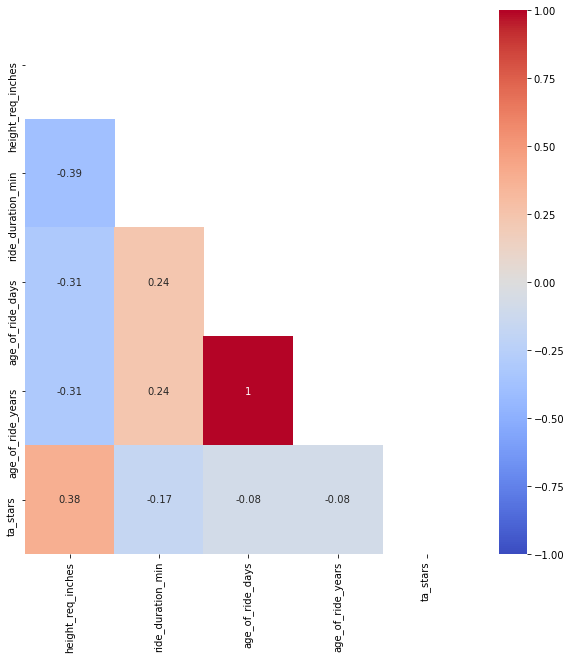

In [67]:
mask = np.zeros_like(rides.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    rides.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

#### Drop the age_of_ride_days column.

In [68]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_days',
       'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [69]:
rides.drop('age_of_ride_days', axis=1, inplace=True)

In [70]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [71]:
rides.head(2)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
1,Astro Orbiter,Magic Kingdom,Tomorrowland,No,Yes,Yes,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,0,1.5,1995-02-25,26.63,3.5
2,Avatar Flight of Passage,Animal Kingdom,Pandora,Yes,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,44,5.0,2017-05-27,4.38,5.0


#### Convert most of the object columns to Boolean values.

In [72]:
rides.dtypes

ride                                 object
park_location                        object
park_area                            object
ride_type_thrill                     object
ride_type_spinning                   object
ride_type_slow                       object
ride_type_small_drops                object
ride_type_big_drops                  object
ride_type_dark                       object
ride_type_scary                      object
ride_type_water                      object
fast_pass                            object
classic                              object
age_interest_all                     object
age_interest_preschoolers            object
age_interest_kids                    object
age_interest_tweens                  object
age_interest_teens                   object
age_interest_adults                  object
height_req_inches                     int64
ride_duration_min                   float64
open_date                    datetime64[ns]
age_of_ride_years               

**Columns that need to be modified include:**

ride_type_thrill
<br>ride_type_spinning
<br>ride_type_slow
<br>ride_type_small_drops
<br>ride_type_big_drops
<br>ride_type_dark
<br>ride_type_scary
<br>ride_type_water
<br>fast_pass
<br>classic
<br>age_interest_all
<br>age_interest_preschoolers
<br>age_interest_kids
<br>age_interest_tweens
<br>age_interest_teens
<br>age_interest_adults

**Since using astype('bool') will always make every string 'true', we need to change our 'no' strings to be empty, so they will be properly treated as false when they become booleans.**

Source: https://stackoverflow.com/questions/715417/converting-from-a-string-to-boolean-in-python

In [73]:
rides['ride_type_thrill'] = rides['ride_type_thrill'].replace(['No'], '')
rides['ride_type_spinning'] = rides['ride_type_spinning'].replace(['No'], '')
rides['ride_type_slow'] = rides['ride_type_slow'].replace(['No'], '')
rides['ride_type_small_drops'] = rides['ride_type_small_drops'].replace(['No'], '')
rides['ride_type_big_drops'] = rides['ride_type_big_drops'].replace(['No'], '')
rides['ride_type_dark'] = rides['ride_type_dark'].replace(['No'], '')
rides['ride_type_scary'] = rides['ride_type_scary'].replace(['No'], '')
rides['ride_type_water'] = rides['ride_type_water'].replace(['No'], '')
rides['fast_pass'] = rides['fast_pass'].replace(['No'], '')
rides['classic'] = rides['classic'].replace(['No'], '')
rides['age_interest_all'] = rides['age_interest_all'].replace(['No'], '')
rides['age_interest_preschoolers'] = rides['age_interest_preschoolers'].replace(['No'], '')
rides['age_interest_kids'] = rides['age_interest_kids'].replace(['No'], '')
rides['age_interest_tweens'] = rides['age_interest_tweens'].replace(['No'], '')
rides['age_interest_teens'] = rides['age_interest_teens'].replace(['No'], '')
rides['age_interest_adults'] = rides['age_interest_adults'].replace(['No'], '')

Test to see if our method of converting strings to booleans works.

In [74]:
rides['ride_type_thrill'].value_counts()

       31
Yes    14
Name: ride_type_thrill, dtype: int64

In [75]:
rides['ride_type_thrill'] = rides['ride_type_thrill'].astype('bool')

Source: https://www.codegrepper.com/code-examples/python/pandas+convert+column+to+boolean

In [76]:
rides['ride_type_thrill'].value_counts()

False    31
True     14
Name: ride_type_thrill, dtype: int64

Since we've confirmed that it works, let's now apply this method to all of the other columns.

In [77]:
rides['ride_type_spinning'] = rides['ride_type_spinning'].astype('bool')
rides['ride_type_slow'] = rides['ride_type_slow'].astype('bool')
rides['ride_type_small_drops'] = rides['ride_type_small_drops'].astype('bool')
rides['ride_type_big_drops'] = rides['ride_type_big_drops'].astype('bool')
rides['ride_type_dark'] = rides['ride_type_dark'].astype('bool')
rides['ride_type_scary'] = rides['ride_type_scary'].astype('bool')
rides['ride_type_water'] = rides['ride_type_water'].astype('bool')
rides['fast_pass'] = rides['fast_pass'].astype('bool')
rides['classic'] = rides['classic'].astype('bool')
rides['age_interest_all'] = rides['age_interest_all'].astype('bool')
rides['age_interest_preschoolers'] = rides['age_interest_preschoolers'].astype('bool')
rides['age_interest_kids'] = rides['age_interest_kids'].astype('bool')
rides['age_interest_tweens'] = rides['age_interest_tweens'].astype('bool')
rides['age_interest_teens'] = rides['age_interest_teens'].astype('bool')
rides['age_interest_adults'] = rides['age_interest_adults'].astype('bool')

And let's check to see that all of the datatypes are now correct.

In [78]:
rides.dtypes

ride                                 object
park_location                        object
park_area                            object
ride_type_thrill                       bool
ride_type_spinning                     bool
ride_type_slow                         bool
ride_type_small_drops                  bool
ride_type_big_drops                    bool
ride_type_dark                         bool
ride_type_scary                        bool
ride_type_water                        bool
fast_pass                              bool
classic                                bool
age_interest_all                       bool
age_interest_preschoolers              bool
age_interest_kids                      bool
age_interest_tweens                    bool
age_interest_teens                     bool
age_interest_adults                    bool
height_req_inches                     int64
ride_duration_min                   float64
open_date                    datetime64[ns]
age_of_ride_years               

Now that everything looks in order, let's check some basic summary statistics.

In [79]:
rides.describe()

,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
count,45.000000,45.000000,45.000000,45.000000
mean,16.200000,6.227778,29.348667,4.211111
std,20.218803,5.129245,15.776159,0.432867
min,0.000000,1.000000,3.290000,3.500000
25%,0.000000,2.500000,19.370000,4.000000
50%,0.000000,5.000000,23.480000,4.000000
75%,40.000000,8.500000,46.750000,4.500000
max,48.000000,20.750000,50.040000,5.000000


In [80]:
rides.corr()

,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
ride_type_thrill,1.000000,-0.047160,-0.823055,0.313011,0.526104,0.218092,0.320921,0.320921,0.359211,-0.244240,-0.862458,-0.904737,NaN,0.101311,0.101311,0.101311,0.852811,-0.321203,-0.331002,0.453565
ride_type_spinning,-0.047160,1.000000,-0.063330,-0.134367,-0.201100,-0.179657,-0.122670,0.128246,-0.069099,0.064535,0.123244,0.098421,NaN,0.085749,0.085749,0.085749,-0.135008,-0.372177,-0.031739,-0.099330
ride_type_slow,-0.823055,-0.063330,1.000000,-0.380304,-0.433013,-0.109109,-0.264135,-0.264135,-0.436436,0.254755,0.860753,0.814955,NaN,0.184637,0.184637,0.184637,-0.829039,0.387701,0.304403,-0.392111
ride_type_small_drops,0.313011,-0.134367,-0.380304,1.000000,-0.225347,0.013104,0.100452,0.100452,0.340693,-0.110613,-0.514618,-0.448395,NaN,-0.236525,-0.236525,-0.236525,0.457113,-0.325876,-0.204612,0.086546
ride_type_big_drops,0.526104,-0.201100,-0.433013,-0.225347,1.000000,0.321270,0.266872,0.266872,0.188982,-0.084856,-0.453743,-0.475986,NaN,0.053300,0.053300,0.053300,0.477467,-0.120440,-0.026260,0.486423
ride_type_dark,0.218092,-0.179657,-0.109109,0.013104,0.321270,1.000000,0.403473,-0.115278,0.157143,-0.012829,-0.134749,-0.161295,NaN,0.080582,0.080582,0.080582,0.122984,0.041863,-0.003004,0.048564
ride_type_scary,0.320921,-0.122670,-0.264135,0.100452,0.266872,0.403473,1.000000,-0.046512,0.115278,-0.144932,-0.276780,-0.290349,NaN,0.032513,0.032513,0.032513,0.256733,-0.089413,-0.055212,0.145558
ride_type_water,0.320921,0.128246,-0.264135,0.100452,0.266872,-0.115278,-0.046512,1.000000,0.115278,-0.144932,-0.276780,-0.290349,NaN,0.032513,0.032513,0.032513,0.245946,0.043466,-0.046986,0.145558
fast_pass,0.359211,-0.069099,-0.436436,0.340693,0.188982,0.157143,0.115278,0.115278,1.000000,-0.102632,-0.416497,-0.397033,NaN,-0.080582,-0.080582,-0.080582,0.433117,-0.331680,-0.249800,0.263635
classic,-0.244240,0.064535,0.254755,-0.110613,-0.084856,-0.012829,-0.144932,-0.144932,-0.102632,1.000000,0.325622,0.298608,NaN,0.101311,0.101311,0.101311,-0.342853,0.102318,0.573680,0.004984


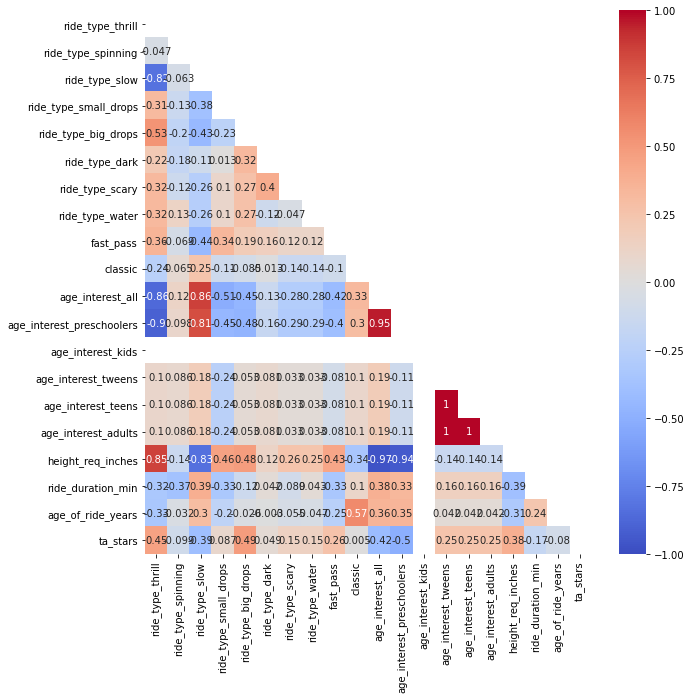

In [81]:
mask = np.zeros_like(rides.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    rides.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

#### Find out why the age_interest_kids column is appearing as not a number.

In [82]:
rides['age_interest_kids'].value_counts()

True    45
Name: age_interest_kids, dtype: int64

Turns out all of the values in that column are true.

---
### Now that cleaning is done, let's do some basic analysis.

#### Calculate the average star rating.

In [83]:
rides['ta_stars'].mean()

4.211111111111111

#### Calculate the average ride duration.

In [84]:
rides['ride_duration_min'].mean()

6.227777777777778

#### Sort by ride duration and star rating to find the shortest and longest rides, highest and lowest-rated rides.

Source: https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

In [85]:
rides.sort_values('ta_stars', ascending = False)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
37,The Twilight Zone Tower of Terror,Hollywood Studios,Sunset Boulevard,True,False,False,False,True,True,True,...,False,True,True,True,True,40,5.00,1994-07-22,27.23,5.0
7,Expedition Everest,Animal Kingdom,Asia,True,False,False,False,True,True,False,...,False,True,True,True,True,44,2.75,2006-04-07,15.52,5.0
25,Rock 'n' Roller Coaster,Hollywood Studios,Sunset Boulevard,True,False,False,False,True,False,False,...,False,True,True,True,True,48,1.25,1999-07-29,22.21,5.0
2,Avatar Flight of Passage,Animal Kingdom,Pandora,True,False,False,False,False,False,False,...,False,True,True,True,True,44,5.00,2017-05-27,4.38,5.0
42,Under the Sea,Magic Kingdom,Fantasyland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,6.25,2012-12-06,8.85,4.5
18,Main Street Vehicles,Magic Kingdom,Main Street USA,False,False,True,False,False,False,False,...,True,True,True,True,True,0,3.00,1971-10-01,50.04,4.5
33,Test Track,Epcot,Future World,True,False,False,True,False,False,False,...,False,True,True,True,True,40,4.00,1999-03-16,22.58,4.5
32,Star Tours,Hollywood Studios,Echo Lake,False,False,False,True,False,False,False,...,False,True,True,True,True,40,5.00,1989-12-15,31.83,4.5
31,Splash Mountain,Magic Kingdom,Frontierland,True,False,False,False,True,False,False,...,False,True,True,True,True,40,11.00,1992-07-17,29.24,4.5
29,Space Mountain,Magic Kingdom,Tomorrowland,True,False,False,False,True,True,False,...,False,True,True,True,True,44,2.50,1975-01-15,46.75,4.5


In [86]:
rides.sort_values('ride_duration_min', ascending = False)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
44,Walt Disney's Carousel of Progress,Magic Kingdom,Tomorrowland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,20.75,1975-01-15,46.75,4.0
43,Walt Disney World Railroad,Magic Kingdom,Main Street USA,False,False,True,False,False,False,False,...,True,True,True,True,True,0,20.00,1971-10-01,50.04,4.0
15,Kilimanjaro Safaris,Animal Kingdom,Africa,False,False,True,False,False,False,False,...,True,True,True,True,True,0,18.50,1998-04-22,23.48,4.5
30,Spaceship Earth,Epcot,Future World,False,False,True,False,False,True,False,...,True,True,True,True,True,0,15.00,1982-10-01,39.04,4.0
16,Living with the Land,Epcot,Future World,False,False,True,False,False,False,False,...,True,True,True,True,True,0,13.75,1982-10-01,39.04,4.0
45,Wildlife Express Train,Animal Kingdom,Africa,False,False,True,False,False,False,False,...,True,True,True,True,True,0,12.00,1998-04-22,23.48,3.5
12,Journey Into Imagination with Figment,Epcot,Future World,False,False,True,False,False,True,False,...,True,True,True,True,True,0,11.00,2002-06-01,19.37,3.5
31,Splash Mountain,Magic Kingdom,Frontierland,True,False,False,False,True,False,False,...,False,True,True,True,True,40,11.00,1992-07-17,29.24,4.5
11,It's a Small World,Magic Kingdom,Fantasyland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,10.50,1971-10-01,50.04,4.0
39,Tomorrowland Transit Authority PeopleMover,Magic Kingdom,Tomorrowland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,10.00,1975-07-01,46.29,4.0


#### Find the highest-rated ride in each park.

In [87]:
rides.sort_values(['ta_stars'], ascending = False).groupby('park_location').head(1)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
37,The Twilight Zone Tower of Terror,Hollywood Studios,Sunset Boulevard,True,False,False,False,True,True,True,...,False,True,True,True,True,40,5.00,1994-07-22,27.23,5.0
7,Expedition Everest,Animal Kingdom,Asia,True,False,False,False,True,True,False,...,False,True,True,True,True,44,2.75,2006-04-07,15.52,5.0
42,Under the Sea,Magic Kingdom,Fantasyland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,6.25,2012-12-06,8.85,4.5
33,Test Track,Epcot,Future World,True,False,False,True,False,False,False,...,False,True,True,True,True,40,4.00,1999-03-16,22.58,4.5


#### Find the highest-rated ride in each land.

In [88]:
rides.sort_values(['ta_stars'], ascending = False).groupby('park_area').head(1)

,ride,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
37,The Twilight Zone Tower of Terror,Hollywood Studios,Sunset Boulevard,True,False,False,False,True,True,True,...,False,True,True,True,True,40,5.00,1994-07-22,27.23,5.0
7,Expedition Everest,Animal Kingdom,Asia,True,False,False,False,True,True,False,...,False,True,True,True,True,44,2.75,2006-04-07,15.52,5.0
2,Avatar Flight of Passage,Animal Kingdom,Pandora,True,False,False,False,False,False,False,...,False,True,True,True,True,44,5.00,2017-05-27,4.38,5.0
42,Under the Sea,Magic Kingdom,Fantasyland,False,False,True,False,False,False,False,...,True,True,True,True,True,0,6.25,2012-12-06,8.85,4.5
18,Main Street Vehicles,Magic Kingdom,Main Street USA,False,False,True,False,False,False,False,...,True,True,True,True,True,0,3.00,1971-10-01,50.04,4.5
33,Test Track,Epcot,Future World,True,False,False,True,False,False,False,...,False,True,True,True,True,40,4.00,1999-03-16,22.58,4.5
32,Star Tours,Hollywood Studios,Echo Lake,False,False,False,True,False,False,False,...,False,True,True,True,True,40,5.00,1989-12-15,31.83,4.5
31,Splash Mountain,Magic Kingdom,Frontierland,True,False,False,False,True,False,False,...,False,True,True,True,True,40,11.00,1992-07-17,29.24,4.5
29,Space Mountain,Magic Kingdom,Tomorrowland,True,False,False,False,True,True,False,...,False,True,True,True,True,44,2.50,1975-01-15,46.75,4.5
27,Slinky Dog Dash,Hollywood Studios,Toy Story Land,True,False,False,True,False,False,False,...,False,True,True,True,True,38,2.00,2018-06-30,3.29,4.5


#### Calculate average ride metrics by park (location) and by land (area).

In [89]:
rides.groupby('park_location').mean()

,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
park_location,,,,,,,,,,,,,,,,,,,,
Animal Kingdom,0.555556,0.333333,0.444444,0.333333,0.111111,0.222222,0.111111,0.111111,0.777778,0.111111,0.444444,0.444444,1.0,1.000000,1.000000,1.000000,23.777778,5.861111,17.378889,4.222222
Epcot,0.250000,0.125000,0.750000,0.375000,0.000000,0.500000,0.000000,0.000000,0.750000,0.125000,0.625000,0.625000,1.0,1.000000,1.000000,1.000000,15.000000,8.437500,21.795000,4.000000
Hollywood Studios,0.600000,0.200000,0.000000,0.400000,0.400000,0.200000,0.200000,0.000000,1.000000,0.000000,0.200000,0.200000,1.0,1.000000,1.000000,1.000000,33.200000,4.250000,19.586000,4.700000
Magic Kingdom,0.173913,0.260870,0.739130,0.217391,0.086957,0.130435,0.000000,0.043478,0.739130,0.521739,0.782609,0.826087,1.0,0.956522,0.956522,0.956522,9.956522,6.032609,38.782174,4.173913


In [90]:
rides.groupby('park_area').mean()

,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
park_area,,,,,,,,,,,,,,,,,,,,
Adventureland,0.000000,0.333333,1.000000,0.333333,0.000000,0.333333,0.000000,0.0,1.000000,0.666667,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,6.333333,39.420000,4.166667
Africa,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.500000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,15.250000,23.480000,4.000000
Asia,1.000000,0.500000,0.000000,0.500000,0.500000,0.500000,0.000000,0.5,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,41.000000,3.125000,19.090000,4.750000
Dinoland USA,0.666667,0.666667,0.333333,0.666667,0.000000,0.333333,0.333333,0.0,0.666667,0.000000,0.333333,0.333333,1.0,1.000000,1.000000,1.000000,29.333333,2.000000,20.836667,4.000000
Echo Lake,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,40.000000,5.000000,31.830000,4.500000
Fantasyland,0.111111,0.333333,0.666667,0.333333,0.000000,0.000000,0.000000,0.0,0.888889,0.555556,0.777778,0.888889,1.0,0.888889,0.888889,0.888889,8.111111,3.472222,34.870000,4.166667
Frontierland,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.5,1.000000,0.500000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,40.000000,7.250000,35.150000,4.500000
Future World,0.333333,0.166667,0.666667,0.333333,0.000000,0.500000,0.000000,0.0,0.833333,0.000000,0.500000,0.500000,1.0,1.000000,1.000000,1.000000,20.000000,9.083333,25.751667,4.000000
Liberty Square,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,7.500000,50.040000,4.500000


#### Count how many rides have each of the star ratings.

In [91]:
rides['ta_stars'].value_counts()

4.5    18
4.0    16
3.5     7
5.0     4
Name: ta_stars, dtype: int64

### Create some visualizations to display the data and identify any potential relationships between variables.

#### Create charts that show the number of rides with each rating.

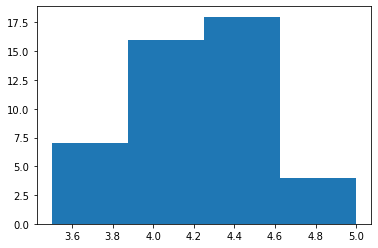

In [92]:
plt.hist(rides['ta_stars'], bins = 4);

#### Create charts that show the number of rides in each park (location).

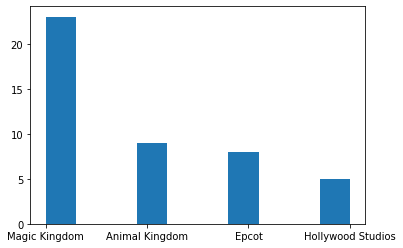

In [93]:
plt.hist(rides['park_location']);

#### Create charts that show the number of rides in each land (area).

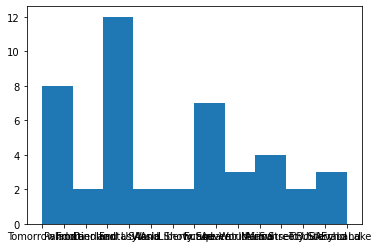

In [94]:
plt.hist(rides['park_area']);

#### Try to visualize any relationships between ride attributes and star ratings.

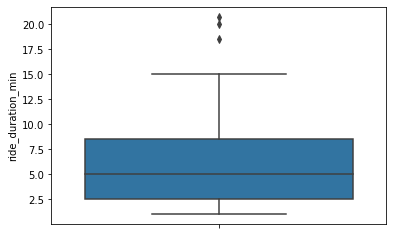

In [95]:
sns.boxplot(data = rides, y = 'ride_duration_min');

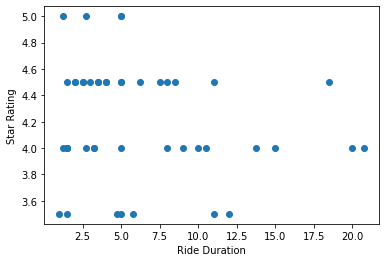

In [96]:
plt.scatter(rides['ride_duration_min'], rides['ta_stars']);
plt.xlabel('Ride Duration')
plt.ylabel('Star Rating');

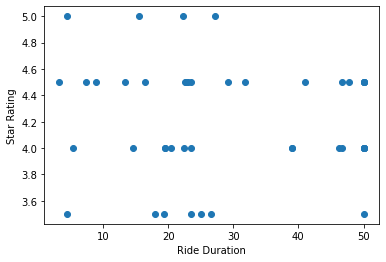

In [97]:
plt.scatter(rides['age_of_ride_years'], rides['ta_stars']);
plt.xlabel('Ride Duration')
plt.ylabel('Star Rating');

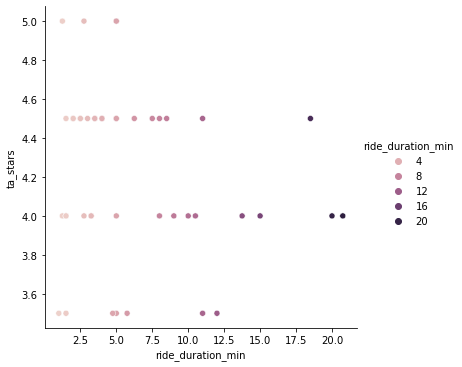

In [98]:
sns.relplot(
    data = rides,
    x = "ride_duration_min", y = "ta_stars",
    hue = "ride_duration_min"
);

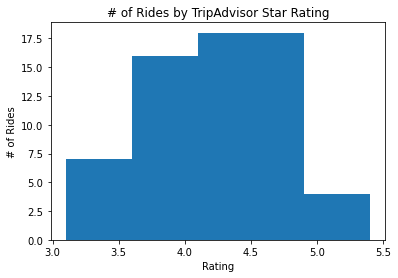

In [99]:
plt.bar(x = rides['ta_stars'].value_counts().index, height = rides['ta_stars'].value_counts())
plt.title('# of Rides by TripAdvisor Star Rating')
plt.xlabel('Rating')
plt.ylabel('# of Rides');

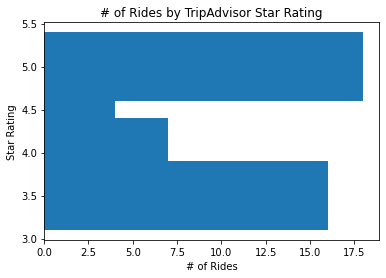

In [100]:
plt.barh(y = rides['ta_stars'].value_counts().index, width = rides['ta_stars'].value_counts(ascending = True))
plt.xlabel('# of Rides')
plt.ylabel('Star Rating')
plt.title('# of Rides by TripAdvisor Star Rating');

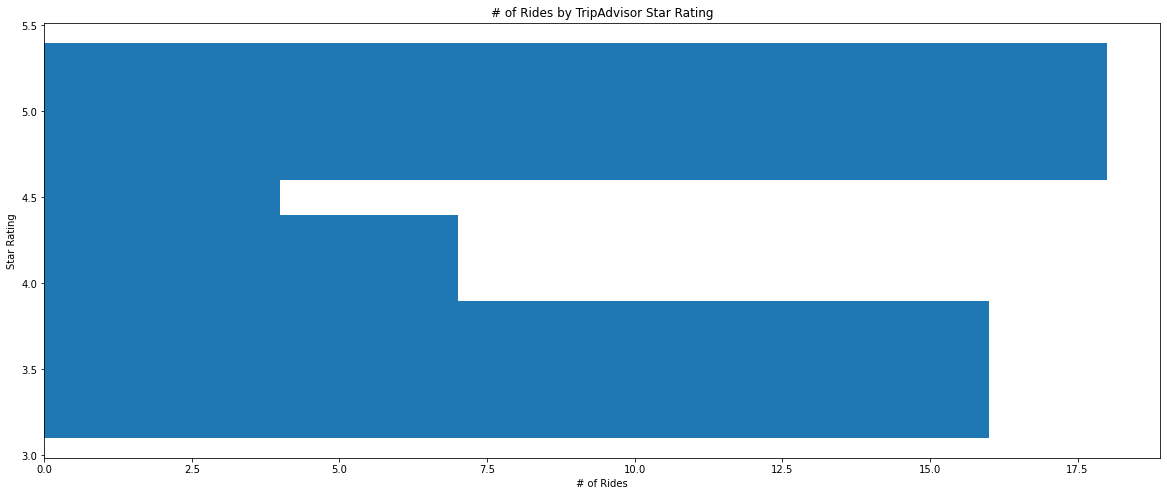

In [101]:
plt.figure(figsize = (20, 8))
plt.barh(y = rides['ta_stars'].value_counts().index, width = rides['ta_stars'].value_counts(ascending = True))
plt.xlabel('# of Rides')
plt.ylabel('Star Rating')
plt.title('# of Rides by TripAdvisor Star Rating');

---
## Scraping Ride Reviews from TripAdvisor

#### Our number of data points is fairly skimpy with this data set, so we need to collect some more ride reviews online from the TripAdvisor web pages for each ride.

After doing the EDA, it's clear that we will need to scrape individual reviews for each ride to supplement the ride information in order to make an effective predictive model for ride rating/popularity/response among park-goers.

Unfortunately, however, TripAdvisor is not an easy site to scrape - it's all in HTML and there is a lot of "noise" per page with ads and featured reviews for other rides (https://www.tripadvisor.com/). The information I wanted most - star ratings - are stored as svg images on TripAdvisor (https://www.w3schools.com/html/html5_svg.asp),rather than strings or numbers, making it very hard to collect that info.

Another challenge I encountered was that even if I figured out how to successfully scrape one page, the HTML classes differed for each page, so the code I used on one page would not work for another. And even if I could apply a standard code to all the pages I wanted, I realized that if I were to try to do that, my IP address would likely get blacklisted because I would need to send get requests for something like 1,000 pages. Even with a sleep function to stagger that a bit, it would take a long time to run in the notebook, espeically with sleep intervals.

#### Need to scrape individual review data from TripAdvisor to flesh out the data set.

I consulted a number of different sources for the various challenges I was encountering with the data scraping:
<br>• https://www.geeksforgeeks.org/how-to-scrape-multiple-pages-of-a-website-using-python/
<br>• https://towardsdatascience.com/scraping-multiple-urls-with-python-tutorial-2b74432d085f
<br>• https://www.worthwebscraping.com/scrape-tripadvisor-reviews-using-python/
<br>• https://stackoverflow.com/questions/60560131/get-review-rating-bubble-from-tripadvisor
<br>• https://www.worthwebscraping.com/how-to-scrape-tripadvisor-hotels-data-using-python/
<br>• https://towardsdatascience.com/scrape-company-reviews-ratings-from-indeed-in-2-minutes-59205222d3ae
<br>• https://stackoverflow.com/questions/63725514/scrapy-how-to-duplicate-content

I also tried various APIs and other codes.
<br>• https://stackoverflow.com/search?page=2&tab=Newest&q=scraping%20tripadvisor%20reviews&s=98c932f0-6341-43b0-a743-bb097c623404&s=0eb1843c-acf4-457f-888c-fd900714f34e
<br>• https://github.com/christopherdoughty/Scraping-TripAdvisor-with-Python-2020
<br>• https://github.com/christopherdoughty/TripAdvisor-Python-Scraper-Restaurants-2021

Tried using an API through GitHub/Apify that _almost_ gave me all the info I needed, but not quite. The Apify API I found gave me a way to consistently scrape data across multiple pages, but it was incomplete, not able to bring in all reviews or all attractions, and what it did bring in was in a horrible csv file that made clusters of data points into features, creating a huge number of features that would have been a real headache to disentangle.
<br>• https://apify.com/maxcopell/tripadvisor
<br>• https://github.com/christopherdoughty/tripadvisor-scraper
<br>• https://docs.apify.com/apify-client-python#installation
<br>• https://console.apify.com/actors/dbEyMBriog95Fv8CW#/runs

Eventually, I found a web tool that allowed me to scrape the data through an almost GUI-like interface, though even with this, the best I could do was scraping the HTML code for the rating svg images and then cleaning that feature so that only the rating number remained.
<br>• https://www.youtube.com/watch?v=fMxuDZeW4qE

**For more details on the data scraping process, see the "data_scraping_tests" notebook.**

#### Combine the Scraped Ride Reviews into One Spreadsheet

I used the Web Harvy tool to scrape data for each ride one at a time (but not one page at a time).

After all pages for a ride were completed, I exported the scraped data into an Excel file.

Once all of the rides had been exported, I consolidated their data into one Excel spreadsheet.

**If you want to see what the scraped files looked like, check out the "scraped_reviews" folder in the "scraping_resources" folder.**

#### Cleaning up the Scraped Ride Review DataFrame

Even with my nifty united Excel spreadsheet in hand, the data was quite ready yet.

The tool wasn't able to isolate just the numeric value of the rating a user had given to a ride, so I had to use an Excel formula to isolate that segment of the HTML code for use as a "rating" feature.

Source: https://www.extendoffice.com/documents/excel/3639-excel-extract-part-of-string.html

Additionally, the review date info was stored in an odd way, as it only displayed the month and year, and was also seemingly combined with another data type (apparently, the type of group they were with when they experienced the ride - solo, couples, friends, family, or business).

I split out the date data from this other data to create two separate features.

Source: https://support.microsoft.com/en-us/office/split-text-into-different-columns-with-the-convert-text-to-columns-wizard-30b14928-5550-41f5-97ca-7a3e9c363ed7

Since there was some leftover spaces after doing the split, did some minor cleaning to remove any hanging spaces.

Source: https://exceljet.net/formula/remove-first-character

Once the date was isolated on its own, I found that changing the date display revealed that it actually contained a full timestamp - not just the month and year - so I adjusted it to display the month, day, and year.

---
### Now that we've scraped the data for each ride and cleaned it, will need to bring our Excel spreadsheet into Jupyter and prepare it for a join with the rides DataFrame for analysis.

#### Import the Excel Workbook of Scraped Data into Jupyter Notebook

In [102]:
reviews = pd.read_excel('./data/wdw_ride_reviews.xlsx')
reviews.head()

,ride,reviewer,reviewer_visit_group_type,review_date,review_title,review_text,rating
0,Astro Orbiter,Courtenay O,NaN,2020-12-20,Short & sweet ride to space!,This ride brings me closer to the sky than any...,5.0
1,Astro Orbiter,Love2Travel100,Family,2020-02-20,Fun both day and night,Recommend riding both in the day and at night ...,4.0
2,Astro Orbiter,Logan C,Family,2019-12-20,Zippy,Much faster than I remember as a child. Defini...,4.0
3,Astro Orbiter,Logan C,Family,2019-03-20,Fun,It’s a lot zippier than I remember.. That bein...,4.0
4,Astro Orbiter,Mark Barnes,Family,2019-05-20,Fun view of the park,Not a fast ride but you do get a very good vie...,4.0


#### Do some light cleaning on this imported data set.

In [103]:
reviews.columns

Index(['ride', 'reviewer', 'reviewer_visit_group_type', 'review_date',
       'review_title', 'review_text', 'rating'],
      dtype='object')

In [104]:
reviews.dtypes

ride                                 object
reviewer                             object
reviewer_visit_group_type            object
review_date                  datetime64[ns]
review_title                         object
review_text                          object
rating                              float64
dtype: object

#### Check for null values.

In [105]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ride                       9843 non-null   object        
 1   reviewer                   9843 non-null   object        
 2   reviewer_visit_group_type  8020 non-null   object        
 3   review_date                9842 non-null   datetime64[ns]
 4   review_title               9843 non-null   object        
 5   review_text                9843 non-null   object        
 6   rating                     9843 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 538.4+ KB


In [106]:
reviews.isna().sum()

ride                            0
reviewer                        0
reviewer_visit_group_type    1823
review_date                     1
review_title                    0
review_text                     0
rating                          0
dtype: int64

Since group_type has so many nulls and is not going to be part of the NLP analysis, we can drop it. Perhaps another time we'll look check for any relationships between group_type categories and the positivity or negativity of the review they leave.

In [107]:
reviews.drop(columns = 'reviewer_visit_group_type', inplace=True)

Checking our list of columns again, we can see that the group_type column was dropped, and that we still have one null data point.

In [108]:
reviews.isna().sum()

ride            0
reviewer        0
review_date     1
review_title    0
review_text     0
rating          0
dtype: int64

In [109]:
null_data = reviews[reviews.isnull().any(axis=1)]
null_data

,ride,reviewer,review_date,review_title,review_text,rating
2638,Gran Fiesta Tour Starring The Three Caballeros,Holly K,NaT,Gran Fiesta for a Siesta from the heat,A gentle boat ride takes you along as The Thre...,3.0


Upon investigating, we see that this data point is for the review date. Now, ordinarily we could just drop this data point and keep the review_date feature if we wanted to take a look at whether time of year had any effect on reviews, but since we won't be doing a time series analysis on this data set right now, we don't need it, and so can drop that entire column.

In [110]:
reviews.drop(columns = 'review_date', inplace=True)

Checking our list again, we now see that we have no null values in our data set anymore.

In [111]:
reviews.isna().sum()

ride            0
reviewer        0
review_title    0
review_text     0
rating          0
dtype: int64

In [112]:
print('columns:', len(reviews.columns))
print('rows:', len(reviews))

columns: 5
rows: 9843


In [113]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ride          9843 non-null   object 
 1   reviewer      9843 non-null   object 
 2   review_title  9843 non-null   object 
 3   review_text   9843 non-null   object 
 4   rating        9843 non-null   float64
dtypes: float64(1), object(4)
memory usage: 384.6+ KB


#### Check to see if some reviewers have left multiple reviews.

In [114]:
reviews.describe()

,rating
count,9843.000000
mean,4.405364
std,0.929795
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [115]:
reviews['reviewer'].value_counts()

JohnCarter          79
Logan C             64
rayraysworld        42
JustECOSM           42
travlynme           41
                    ..
Disneyrunner2015     1
Jeff S               1
luron                1
rowo                 1
Kris B               1
Name: reviewer, Length: 3326, dtype: int64

In [116]:
reviews['reviewer'].value_counts().head(200)

JohnCarter          79
Logan C             64
rayraysworld        42
JustECOSM           42
travlynme           41
                    ..
Jaguar F Type       11
nimo                11
sleepystrawberry    11
Bosanchubo          11
socalukgirl         11
Name: reviewer, Length: 200, dtype: int64

In [117]:
reviews['reviewer'].value_counts().head(200).sum()

4171

In [118]:
reviews['rating'].value_counts().sum()

9843

In [119]:
reviews['reviewer'].value_counts().min()

1

In [120]:
reviews['reviewer'].value_counts().max()

79

In [121]:
reviews['reviewer'].value_counts().mean()

2.959410703547805

In [122]:
reviews['reviewer'].value_counts().median()

1.0

In [123]:
reviewer_stats = reviews.groupby('reviewer')[['rating']].agg(
    min_rating = ('rating', 'min'),
    max_rating = ('rating', 'max'),
    mean_rating = ('rating', 'mean'),
    median_rating = ('rating', 'median'))
reviewer_stats

,min_rating,max_rating,mean_rating,median_rating
reviewer,,,,
009Vix,5.0,5.0,5.000000,5.0
04DTS,4.0,5.0,4.750000,5.0
0ur_0pini0n,3.0,5.0,4.633333,5.0
101jumper,3.0,5.0,4.000000,4.0
112daley,5.0,5.0,5.000000,5.0
...,...,...,...,...
yss97,3.0,5.0,4.358974,5.0
zayne m,1.0,1.0,1.000000,1.0
ziggy2720,4.0,4.0,4.000000,4.0


In [124]:
reviewer_stats['review_count'] = reviews['reviewer'].value_counts()
reviewer_stats.sort_values(by = 'review_count', ascending = False)

,min_rating,max_rating,mean_rating,median_rating,review_count
reviewer,,,,,
JohnCarter,3.0,5.0,4.531646,5.0,79
Logan C,1.0,5.0,4.265625,5.0,64
JustECOSM,3.0,5.0,4.523810,5.0,42
rayraysworld,3.0,5.0,3.738095,4.0,42
travlynme,3.0,5.0,4.682927,5.0,41
...,...,...,...,...,...
Kit,5.0,5.0,5.000000,5.0,1
KittyCat,1.0,1.0,1.000000,1.0,1
KittyLoverGRL2006,5.0,5.0,5.000000,5.0,1


In [125]:
reviewers_by_count = pd.DataFrame(reviewer_stats.groupby('review_count')['review_count'].count().sort_values(ascending = False))
reviewers_by_count

,review_count
review_count,
1,2211
2,382
3,167
4,127
5,57
6,55
8,40
7,34
9,28


Source: https://realpython.com/pandas-groupby/

In [126]:
reviewers_by_count.rename(columns={'review_count': 'reviewer_count'}, inplace=True)
reviewers_by_count

,reviewer_count
review_count,
1,2211
2,382
3,167
4,127
5,57
6,55
8,40
7,34
9,28


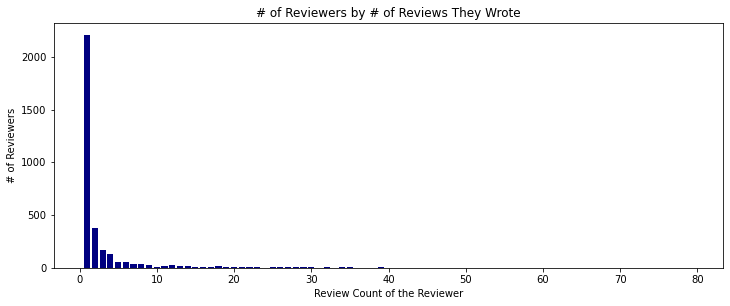

In [127]:
plt.figure(figsize = (12, 4.5))
plt.bar(x = reviewers_by_count['reviewer_count'].index, height = reviewers_by_count['reviewer_count'], color = ['navy'])
plt.title('# of Reviewers by # of Reviews They Wrote')
plt.xlabel('Review Count of the Reviewer')
plt.ylabel('# of Reviewers');

After doing some quick analysis, we see that the top 200 reviewers out of all 3,226 reviewers have left 4,171 of the 9,843 total reviews (42%). So even though the average reviewer leaves 3 reviews or less (mean is 3, median is 1), the most prolific reviewers may have an outsized influence on the data set.

In [128]:
reviews['rating'].value_counts().sort_index(ascending = False)

5.0    6081
4.0    2393
3.0     902
2.0     212
1.0     255
Name: rating, dtype: int64

Source: https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts

In [129]:
rides['ta_stars'].value_counts().sort_index(ascending = False)

5.0     4
4.5    18
4.0    16
3.5     7
Name: ta_stars, dtype: int64

Most of the reviews are 5's (6,081 | 62%) or 4's (2,393 | 24%), while most rides (34 out of 45 | 76%) have an average rating of 4 or 4.5.

In [130]:
reviews['rating'].value_counts(normalize=True).sort_index(ascending = False)

5.0    0.617799
4.0    0.243117
3.0    0.091639
2.0    0.021538
1.0    0.025907
Name: rating, dtype: float64

In [131]:
rides['ta_stars'].value_counts(normalize=True).sort_index(ascending = False)

5.0    0.088889
4.5    0.400000
4.0    0.355556
3.5    0.155556
Name: ta_stars, dtype: float64

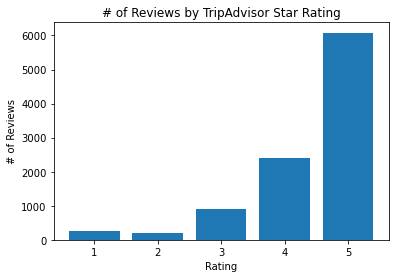

In [132]:
plt.bar(x = reviews['rating'].value_counts().index, height = reviews['rating'].value_counts())
plt.title('# of Reviews by TripAdvisor Star Rating')
plt.xlabel('Rating')
plt.ylabel('# of Reviews');

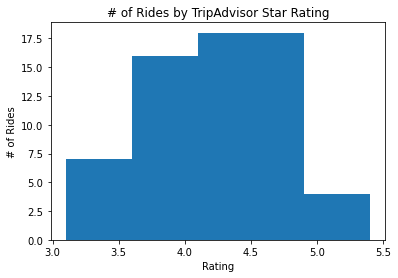

In [133]:
plt.bar(x = rides['ta_stars'].value_counts().index, height = rides['ta_stars'].value_counts())
plt.title('# of Rides by TripAdvisor Star Rating')
plt.xlabel('Rating')
plt.ylabel('# of Rides');

In [134]:
reviews['rating'].mean()

4.4053642182261505

In [135]:
reviews['rating'].median()

5.0

In [136]:
reviews['rating'].min()

1.0

In [137]:
reviews['rating'].max()

5.0

In [138]:
rides['ta_stars'].mean()

4.211111111111111

In [139]:
rides['ta_stars'].median()

4.0

In [140]:
rides['ta_stars'].min()

3.5

In [141]:
rides['ta_stars'].max()

5.0

---
### Joining the Scraped Ride Review Dataframe to the Original Ride Information DataFrame

#### We need to compare the information between the two dataframes to ensure there is a key we can use to join on, and that all of the ride names match, since we want to join on the ride column.

In [142]:
reviews.columns

Index(['ride', 'reviewer', 'review_title', 'review_text', 'rating'], dtype='object')

In [143]:
rides.columns

Index(['ride', 'park_location', 'park_area', 'ride_type_thrill',
       'ride_type_spinning', 'ride_type_slow', 'ride_type_small_drops',
       'ride_type_big_drops', 'ride_type_dark', 'ride_type_scary',
       'ride_type_water', 'fast_pass', 'classic', 'age_interest_all',
       'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens',
       'age_interest_teens', 'age_interest_adults', 'height_req_inches',
       'ride_duration_min', 'open_date', 'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [144]:
reviews['ride'].value_counts().sort_index()

Astro Orbiter                                       47
Avatar Flight of Passage                          1316
Big Thunder Mountain Railroad                      275
Buzz Lightyear's Space Ranger Spin                 224
Dinosaur                                           158
Dumbo the Flying Elephant                           96
Expedition Everest                                 357
Frozen Ever After                                  118
Gran Fiesta Tour Starring The Three Caballeros      85
Haunted Mansion                                    338
It's a Small World                                 246
Journey Into Imagination with Figment              123
Jungle Cruise                                      226
Kali River Rapids                                  260
Kilimanjaro Safaris                                310
Living with the Land                               194
Mad Tea Party                                       70
Main Street Vehicles                                14
Mission Sp

In [145]:
rides['ride'].value_counts().sort_index()

Astro Orbiter                                     1
Avatar Flight of Passage                          1
Big Thunder Mountain Railroad                     1
Buzz Lightyear's Space Ranger Spin                1
Dinosaur                                          1
Dumbo the Flying Elephant                         1
Expedition Everest                                1
Frozen Ever After                                 1
Gran Fiesta Tour Starring The Three Caballeros    1
Haunted Mansion                                   1
It's a Small World                                1
Journey Into Imagination with Figment             1
Jungle Cruise                                     1
Kali River Rapids                                 1
Kilimanjaro Safaris                               1
Living with the Land                              1
Mad Tea Party                                     1
Main Street Vehicles                              1
Mission Space                                     1
Na'vi River 

#### It looks like everything checks out, so let's go ahead and do a join between the reviews dataframe and the rides dataframe.

In [146]:
ride_reviews = pd.merge(reviews, rides, on = 'ride')
ride_reviews.head()

,ride,reviewer,review_title,review_text,rating,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,...,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars
0,Astro Orbiter,Courtenay O,Short & sweet ride to space!,This ride brings me closer to the sky than any...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,True,0,1.5,1995-02-25,26.63,3.5
1,Astro Orbiter,Love2Travel100,Fun both day and night,Recommend riding both in the day and at night ...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,True,0,1.5,1995-02-25,26.63,3.5
2,Astro Orbiter,Logan C,Zippy,Much faster than I remember as a child. Defini...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,True,0,1.5,1995-02-25,26.63,3.5
3,Astro Orbiter,Logan C,Fun,It’s a lot zippier than I remember.. That bein...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,True,0,1.5,1995-02-25,26.63,3.5
4,Astro Orbiter,Mark Barnes,Fun view of the park,Not a fast ride but you do get a very good vie...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,True,0,1.5,1995-02-25,26.63,3.5


Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

---
## Exploratory Analysis of Newly Combined DataFrame

### Let's explore the new rides_reviews dataframe we just created.

In [147]:
ride_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9843 entries, 0 to 9842
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ride                       9843 non-null   object        
 1   reviewer                   9843 non-null   object        
 2   review_title               9843 non-null   object        
 3   review_text                9843 non-null   object        
 4   rating                     9843 non-null   float64       
 5   park_location              9843 non-null   object        
 6   park_area                  9843 non-null   object        
 7   ride_type_thrill           9843 non-null   bool          
 8   ride_type_spinning         9843 non-null   bool          
 9   ride_type_slow             9843 non-null   bool          
 10  ride_type_small_drops      9843 non-null   bool          
 11  ride_type_big_drops        9843 non-null   bool          
 12  ride_t

In [148]:
ride_reviews.describe()

,rating,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000
mean,4.405364,23.739612,6.398227,25.966408,4.424464
std,0.929795,20.633538,4.498927,16.102547,0.435436
min,1.000000,0.000000,1.000000,3.290000,3.500000
25%,4.000000,0.000000,3.500000,13.370000,4.000000
50%,5.000000,38.000000,5.000000,22.660000,4.500000
75%,5.000000,40.000000,8.000000,41.060000,4.500000
max,5.000000,48.000000,20.750000,50.040000,5.000000


In [149]:
ride_reviews.columns

Index(['ride', 'reviewer', 'review_title', 'review_text', 'rating',
       'park_location', 'park_area', 'ride_type_thrill', 'ride_type_spinning',
       'ride_type_slow', 'ride_type_small_drops', 'ride_type_big_drops',
       'ride_type_dark', 'ride_type_scary', 'ride_type_water', 'fast_pass',
       'classic', 'age_interest_all', 'age_interest_preschoolers',
       'age_interest_kids', 'age_interest_tweens', 'age_interest_teens',
       'age_interest_adults', 'height_req_inches', 'ride_duration_min',
       'open_date', 'age_of_ride_years', 'ta_stars'],
      dtype='object')

In [150]:
ride_reviews['ride'].value_counts().sort_index()

Astro Orbiter                                       47
Avatar Flight of Passage                          1316
Big Thunder Mountain Railroad                      275
Buzz Lightyear's Space Ranger Spin                 224
Dinosaur                                           158
Dumbo the Flying Elephant                           96
Expedition Everest                                 357
Frozen Ever After                                  118
Gran Fiesta Tour Starring The Three Caballeros      85
Haunted Mansion                                    338
It's a Small World                                 246
Journey Into Imagination with Figment              123
Jungle Cruise                                      226
Kali River Rapids                                  260
Kilimanjaro Safaris                                310
Living with the Land                               194
Mad Tea Party                                       70
Main Street Vehicles                                14
Mission Sp

Sources:
<br>• https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
<br>• https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function

In [151]:
ride_stats = ride_reviews.groupby('ride')[['rating']].agg(
    min_rating = ('rating', 'min'),
    max_rating = ('rating', 'max'),
    mean_rating = ('rating', 'mean'),
    median_rating = ('rating', 'median'))
ride_stats

,min_rating,max_rating,mean_rating,median_rating
ride,,,,
Astro Orbiter,1.0,5.0,3.787234,4.0
Avatar Flight of Passage,1.0,5.0,4.790274,5.0
Big Thunder Mountain Railroad,1.0,5.0,4.650909,5.0
Buzz Lightyear's Space Ranger Spin,1.0,5.0,4.450893,5.0
Dinosaur,1.0,5.0,4.044304,4.0
Dumbo the Flying Elephant,3.0,5.0,4.437500,5.0
Expedition Everest,1.0,5.0,4.787115,5.0
Frozen Ever After,1.0,5.0,4.169492,4.0
Gran Fiesta Tour Starring The Three Caballeros,1.0,5.0,4.011765,4.0


In [152]:
park_location_stats = ride_reviews.groupby('park_location')[['rating']].agg(
    min_rating = ('rating', 'min'),
    max_rating = ('rating', 'max'),
    mean_rating = ('rating', 'mean'),
    median_rating = ('rating', 'median'))
park_location_stats

,min_rating,max_rating,mean_rating,median_rating
park_location,,,,
Animal Kingdom,1.0,5.0,4.569139,5.0
Epcot,1.0,5.0,4.283798,5.0
Hollywood Studios,1.0,5.0,4.700658,5.0
Magic Kingdom,1.0,5.0,4.265196,5.0


In [153]:
park_area_stats = ride_reviews.groupby('park_area')[['rating']].agg(
    min_rating = ('rating', 'min'),
    max_rating = ('rating', 'max'),
    mean_rating = ('rating', 'mean'),
    median_rating = ('rating', 'median'))
park_area_stats

,min_rating,max_rating,mean_rating,median_rating
park_area,,,,
Adventureland,1.0,5.0,4.238411,4.0
Africa,1.0,5.0,4.629310,5.0
Asia,1.0,5.0,4.552674,5.0
Dinoland USA,1.0,5.0,3.961538,4.0
Echo Lake,1.0,5.0,4.542857,5.0
Fantasyland,1.0,5.0,4.107444,4.0
Frontierland,1.0,5.0,4.678947,5.0
Future World,1.0,5.0,4.305840,5.0
Liberty Square,1.0,5.0,4.402367,5.0


In [154]:
ride_stats['average_rating'] = ride_reviews.groupby('ride')['ta_stars'].mean()
ride_stats['review_count'] = ride_reviews['ride'].value_counts()
ride_stats.sort_values(by = 'review_count', ascending = False)

,min_rating,max_rating,mean_rating,median_rating,average_rating,review_count
ride,,,,,,
Avatar Flight of Passage,1.0,5.0,4.790274,5.0,5.0,1316
Soarin',1.0,5.0,4.734982,5.0,4.5,566
Seven Dwarfs Mine Train,1.0,5.0,4.150895,5.0,4.5,391
The Twilight Zone Tower of Terror,1.0,5.0,4.748031,5.0,5.0,381
Expedition Everest,1.0,5.0,4.787115,5.0,5.0,357
Haunted Mansion,1.0,5.0,4.402367,5.0,4.5,338
Space Mountain,1.0,5.0,4.440729,5.0,4.5,329
Toy Story Midway Mania,1.0,5.0,4.748408,5.0,4.5,314
Pirates of the Caribbean,1.0,5.0,4.395498,5.0,4.5,311


In [155]:
park_location_stats['average_rating'] = ride_reviews.groupby('park_location')['ta_stars'].mean()
park_location_stats['review_count'] = ride_reviews['park_location'].value_counts()
park_location_stats.sort_values(by = 'review_count', ascending = False)

,min_rating,max_rating,mean_rating,median_rating,average_rating,review_count
park_location,,,,,,
Magic Kingdom,1.0,5.0,4.265196,5.0,4.276716,4080
Animal Kingdom,1.0,5.0,4.569139,5.0,4.696236,2683
Epcot,1.0,5.0,4.283798,5.0,4.132511,1864
Hollywood Studios,1.0,5.0,4.700658,5.0,4.768092,1216


In [156]:
park_area_stats['park_location'] = ride_reviews.groupby('park_area')['park_location']
park_area_stats['average_rating'] = ride_reviews.groupby('park_area')['ta_stars'].mean()
park_area_stats['review_count'] = ride_reviews['park_area'].value_counts()
park_area_stats.sort_values(by = 'review_count', ascending = False)

,min_rating,max_rating,mean_rating,median_rating,park_location,average_rating,review_count
park_area,,,,,,,
Future World,1.0,5.0,4.305840,5.0,"(Future World, [Epcot, Epcot, Epcot, Epcot, Ep...",4.148706,1661
Pandora,1.0,5.0,4.670096,5.0,"(Pandora, [Animal Kingdom, Animal Kingdom, Ani...",4.853909,1458
Fantasyland,1.0,5.0,4.107444,4.0,"(Fantasyland, [Magic Kingdom, Magic Kingdom, M...",4.222963,1424
Tomorrowland,1.0,5.0,4.223507,5.0,"(Tomorrowland, [Magic Kingdom, Magic Kingdom, ...",4.187861,1038
Sunset Boulevard,1.0,5.0,4.748466,5.0,"(Sunset Boulevard, [Hollywood Studios, Hollywo...",5.000000,652
Asia,1.0,5.0,4.552674,5.0,"(Asia, [Animal Kingdom, Animal Kingdom, Animal...",4.789303,617
Adventureland,1.0,5.0,4.238411,4.0,"(Adventureland, [Magic Kingdom, Magic Kingdom,...",4.257450,604
Frontierland,1.0,5.0,4.678947,5.0,"(Frontierland, [Magic Kingdom, Magic Kingdom, ...",4.500000,570
Toy Story Land,1.0,5.0,4.706215,5.0,"(Toy Story Land, [Hollywood Studios, Hollywood...",4.500000,354


In [157]:
ride_stats.sort_values(by = 'average_rating', ascending = False)

,min_rating,max_rating,mean_rating,median_rating,average_rating,review_count
ride,,,,,,
The Twilight Zone Tower of Terror,1.0,5.0,4.748031,5.0,5.0,381
Expedition Everest,1.0,5.0,4.787115,5.0,5.0,357
Rock 'n' Roller Coaster,1.0,5.0,4.749077,5.0,5.0,271
Avatar Flight of Passage,1.0,5.0,4.790274,5.0,5.0,1316
Under the Sea,1.0,5.0,4.308140,4.0,4.5,172
Main Street Vehicles,3.0,5.0,4.357143,4.5,4.5,14
Test Track,1.0,5.0,4.423611,5.0,4.5,288
Star Tours,1.0,5.0,4.542857,5.0,4.5,210
Splash Mountain,1.0,5.0,4.705085,5.0,4.5,295


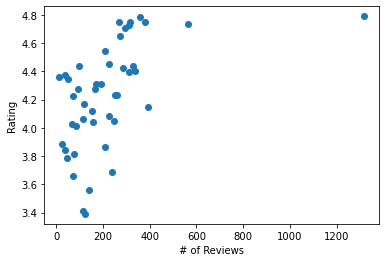

In [158]:
plt.scatter(ride_stats['review_count'], ride_stats['mean_rating']);
plt.xlabel('# of Reviews')
plt.ylabel('Rating');

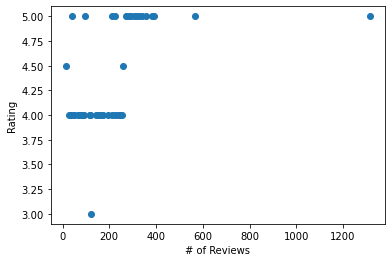

In [159]:
plt.scatter(ride_stats['review_count'], ride_stats['median_rating']);
plt.xlabel('# of Reviews')
plt.ylabel('Rating');

In [160]:
ride_stats.corr()

,min_rating,max_rating,mean_rating,median_rating,average_rating,review_count
min_rating,1.000000,NaN,0.064390,-0.016080,0.128753,-0.275451
max_rating,NaN,NaN,NaN,NaN,NaN,NaN
mean_rating,0.064390,NaN,1.000000,0.808736,0.903898,0.512011
median_rating,-0.016080,NaN,0.808736,1.000000,0.814293,0.498093
average_rating,0.128753,NaN,0.903898,0.814293,1.000000,0.534846
review_count,-0.275451,NaN,0.512011,0.498093,0.534846,1.000000


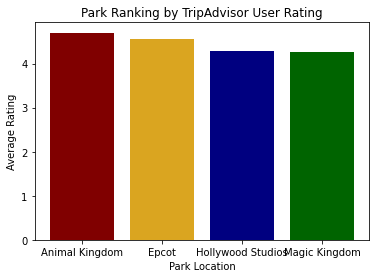

In [161]:
plt.bar(x = park_location_stats['mean_rating'].index, height = park_location_stats['mean_rating'].sort_values(ascending = False), color = ['maroon', 'goldenrod', 'navy', 'darkgreen'])
plt.title('Park Ranking by TripAdvisor User Rating')
plt.xlabel('Park Location')
plt.ylabel('Average Rating');

Source: https://matplotlib.org/stable/tutorials/colors/colors.html

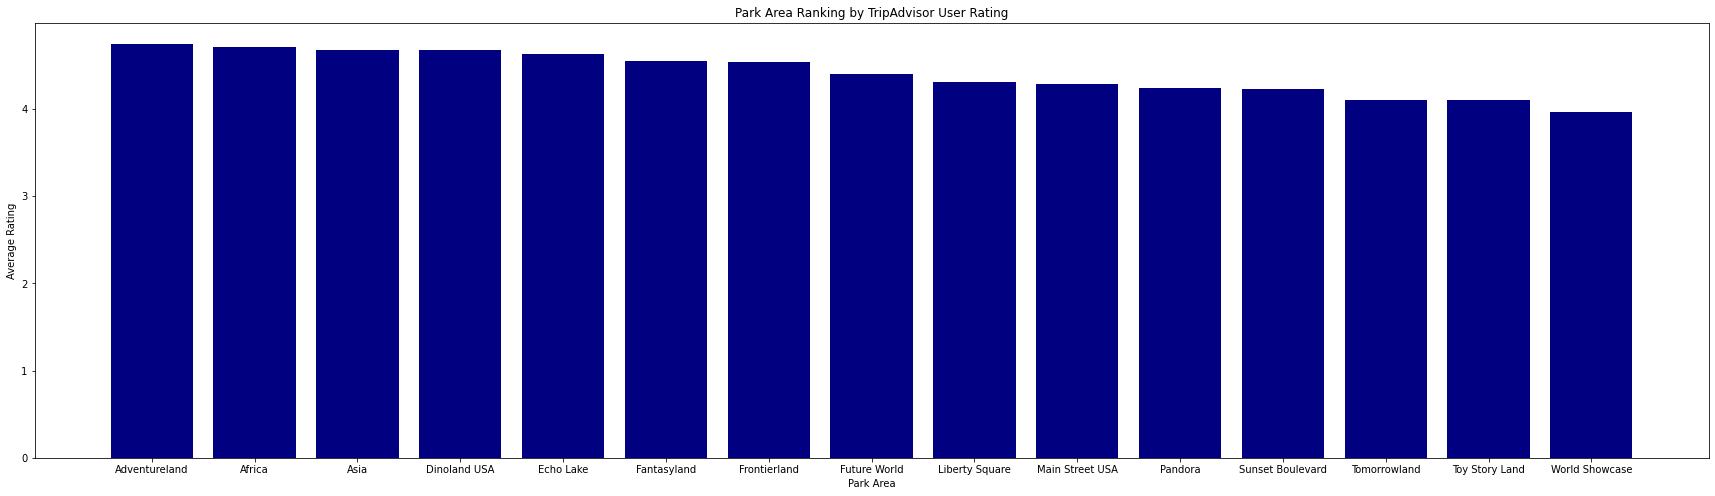

In [162]:
plt.figure(figsize = (30, 8))
plt.bar(x = park_area_stats['mean_rating'].index, height = park_area_stats['mean_rating'].sort_values(ascending = False), color = ['navy'])
plt.title('Park Area Ranking by TripAdvisor User Rating')
plt.xlabel('Park Area')
plt.ylabel('Average Rating');

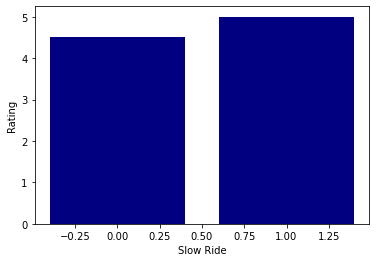

In [163]:
plt.bar(ride_reviews['ride_type_thrill'], ride_reviews['ta_stars'], color = 'navy');
plt.xlabel('Slow Ride')
plt.ylabel('Rating');

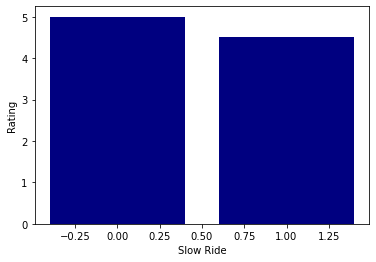

In [164]:
plt.bar(ride_reviews['ride_type_slow'], ride_reviews['ta_stars'], color = 'navy');
plt.xlabel('Slow Ride')
plt.ylabel('Rating');

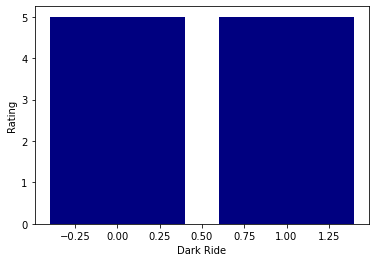

In [165]:
plt.bar(ride_reviews['ride_type_dark'], ride_reviews['ta_stars'], color = 'navy');
plt.xlabel('Dark Ride')
plt.ylabel('Rating');

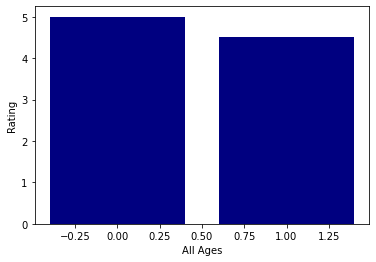

In [166]:
plt.bar(ride_reviews['age_interest_all'], ride_reviews['ta_stars'], color = 'navy');
plt.xlabel('All Ages')
plt.ylabel('Rating');

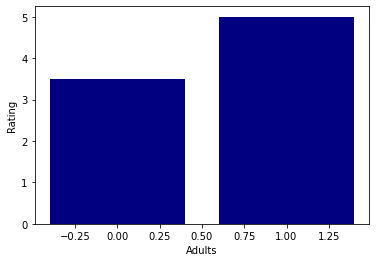

In [167]:
plt.bar(ride_reviews['age_interest_adults'], ride_reviews['ta_stars'], color = 'navy');
plt.xlabel('Adults')
plt.ylabel('Rating');

---
## Creating Predictive Models

#### Once we have the united dataframe to work with, will need to run different machine learning models to see which approach will be best at predicting the rides with the highest ratings.

**Models/Techniques Applied:** 
<br>• Linear Regression
<br>• One Hot Encoding
<br>• Standard Scaler (standardization)
<br>• Lasso and Ridge Regressions (regularization)
<br>• Grid Search CV
<br>• Logistic Regression
<br>• Confusion Matrices
<br>• K Nearest Neighbors
<br>• Random Forests
<br>• Gradient Boosting (regression and classification)
<br>• Natural Language Processing

---
## Linear Regression

#### First, we need to split our data into feature variables (`X`) and target variable (`y`)

We'll want to check our data to see which variables to include or exclude for X.

In [168]:
ride_reviews.corr()

,rating,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,...,age_interest_all,age_interest_preschoolers,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years,ta_stars
rating,1.000000,0.135959,-0.068217,-0.151554,-0.037771,0.135134,-0.036900,0.035306,0.020381,0.083606,...,-0.172230,-0.183933,NaN,0.069527,0.069527,0.069527,0.165111,-0.016958,-0.119191,0.352195
ride_type_thrill,0.135959,1.000000,-0.070366,-0.873037,0.032935,0.469008,0.103766,0.253115,0.257066,0.306434,...,-0.840999,-0.853736,NaN,0.082197,0.082197,0.082197,0.842120,-0.451290,-0.423180,0.542737
ride_type_spinning,-0.068217,-0.070366,1.000000,-0.092519,-0.066717,-0.186571,-0.097664,-0.100689,0.219388,0.015558,...,0.143518,0.137030,NaN,0.036161,0.036161,0.036161,-0.163120,-0.193278,-0.056346,-0.191869
ride_type_slow,-0.151554,-0.873037,-0.092519,1.000000,-0.069095,-0.409461,-0.022410,-0.220979,-0.224428,-0.350998,...,0.805500,0.790414,NaN,0.079361,0.079361,0.079361,-0.795899,0.476282,0.438201,-0.517045
ride_type_small_drops,-0.037771,0.032935,-0.066717,-0.069095,1.000000,-0.293670,-0.100718,-0.004880,0.088355,0.212194,...,-0.297103,-0.273934,NaN,-0.131273,-0.131273,-0.131273,0.232289,-0.324022,-0.021020,-0.065851
ride_type_big_drops,0.135134,0.469008,-0.186571,-0.409461,-0.293670,1.000000,0.393006,0.350016,0.240263,0.143720,...,-0.394435,-0.400409,NaN,0.038551,0.038551,0.038551,0.416499,-0.191553,0.060003,0.393812
ride_type_dark,-0.036900,0.103766,-0.097664,-0.022410,-0.100718,0.393006,1.000000,0.401204,-0.146649,-0.006255,...,-0.000144,-0.009094,NaN,0.051857,0.051857,0.051857,-0.006895,-0.008466,0.233328,-0.031063
ride_type_scary,0.035306,0.253115,-0.100689,-0.220979,-0.004880,0.350016,0.401204,1.000000,-0.058836,0.077563,...,-0.212870,-0.216094,NaN,0.020805,0.020805,0.020805,0.189688,-0.102254,0.002456,0.156107
ride_type_water,0.020381,0.257066,0.219388,-0.224428,0.088355,0.240263,-0.146649,-0.058836,1.000000,0.078774,...,-0.216192,-0.219466,NaN,0.021130,0.021130,0.021130,0.181548,0.059133,0.002901,0.042407
fast_pass,0.083606,0.306434,0.015558,-0.350998,0.212194,0.143720,-0.006255,0.077563,0.078774,1.000000,...,-0.364369,-0.358933,NaN,-0.027855,-0.027855,-0.027855,0.370782,-0.462747,-0.269143,0.322940


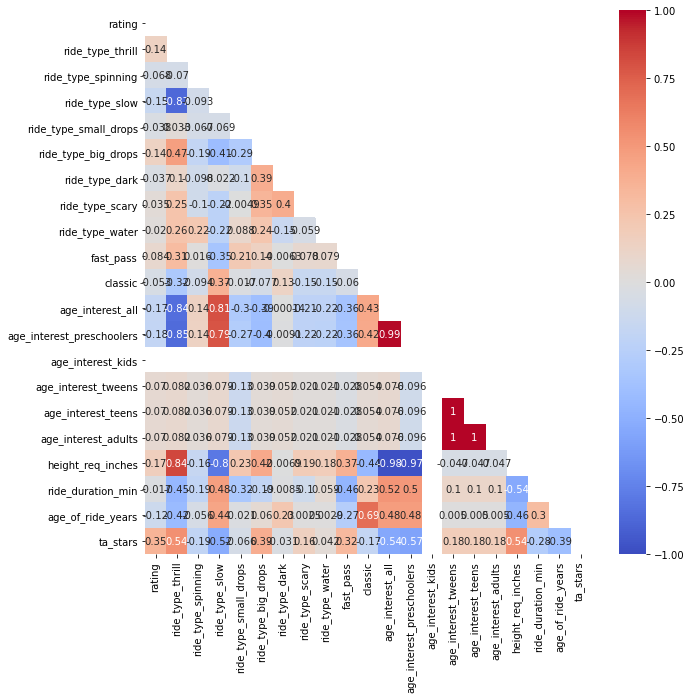

In [169]:
mask = np.zeros_like(ride_reviews.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    ride_reviews.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

In [170]:
ride_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9843 entries, 0 to 9842
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ride                       9843 non-null   object        
 1   reviewer                   9843 non-null   object        
 2   review_title               9843 non-null   object        
 3   review_text                9843 non-null   object        
 4   rating                     9843 non-null   float64       
 5   park_location              9843 non-null   object        
 6   park_area                  9843 non-null   object        
 7   ride_type_thrill           9843 non-null   bool          
 8   ride_type_spinning         9843 non-null   bool          
 9   ride_type_slow             9843 non-null   bool          
 10  ride_type_small_drops      9843 non-null   bool          
 11  ride_type_big_drops        9843 non-null   bool          
 12  ride_t

Since we want to guess the ride rating, that will be our target y.

For X, we want every column except our target, as well as variables that can't be used as reliable predictors right now.
<br>• Since rating and ta_stars are related to the target, they will be excluded.
<br>• We're excluding ride because we want to see if the model can make predictions without knowing which ride it is.
<br>• We're excluding reviewer because we don't want someone's unique identity being taken into account.
<br>• We're excluding review_title and review_text because we have not yet used natural language processing to make those text fields interpretable - and also because we're trying to see if we can predict ride popularity based purely on ride characteristics.
<br>• We're excluding age_interest_preschoolers because it's highly correlated with age_interest_all, as well as tweens and teens, since they are highly correlated with adults.
<br>• We're excluding age_interest_kids because this is true of every ride in the data set, and so isn't a differentiating characteristic.
<br>• We're excluding open_date because we essentially get the information that field provides us from the age_of_ride_years column.

In [171]:
X = ride_reviews.drop(columns = ['ride', 'reviewer', 'review_title', 'review_text', 'rating', 'ta_stars', 'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens', 'age_interest_teens', 'open_date'])
y = ride_reviews['rating']

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [172]:
X

,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
0,Magic Kingdom,Tomorrowland,False,True,True,False,False,False,False,False,False,True,True,True,0,1.5,26.63
1,Magic Kingdom,Tomorrowland,False,True,True,False,False,False,False,False,False,True,True,True,0,1.5,26.63
2,Magic Kingdom,Tomorrowland,False,True,True,False,False,False,False,False,False,True,True,True,0,1.5,26.63
3,Magic Kingdom,Tomorrowland,False,True,True,False,False,False,False,False,False,True,True,True,0,1.5,26.63
4,Magic Kingdom,Tomorrowland,False,True,True,False,False,False,False,False,False,True,True,True,0,1.5,26.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,Animal Kingdom,Africa,False,False,True,False,False,False,False,False,False,False,True,True,0,12.0,23.48
9839,Animal Kingdom,Africa,False,False,True,False,False,False,False,False,False,False,True,True,0,12.0,23.48
9840,Animal Kingdom,Africa,False,False,True,False,False,False,False,False,False,False,True,True,0,12.0,23.48
9841,Animal Kingdom,Africa,False,False,True,False,False,False,False,False,False,False,True,True,0,12.0,23.48


In [173]:
y

0       5.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
9838    3.0
9839    3.0
9840    3.0
9841    4.0
9842    3.0
Name: rating, Length: 9843, dtype: float64

#### Next, we create our training and test sets

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1234)

In [176]:
X_train.head()

,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
9331,Hollywood Studios,Toy Story Land,False,True,False,False,False,False,False,False,True,False,True,True,0,8.00,13.37
816,Animal Kingdom,Pandora,True,False,False,False,False,False,False,False,True,False,False,True,44,5.00,4.38
6755,Magic Kingdom,Tomorrowland,True,False,False,False,True,True,False,False,True,True,False,True,44,2.50,46.75
8860,Magic Kingdom,Tomorrowland,False,False,True,False,False,False,False,False,True,False,True,True,32,4.75,50.04
9409,Magic Kingdom,Fantasyland,False,False,True,False,False,False,False,False,True,False,True,True,0,6.25,8.85


In [177]:
y_train.head()

9331    5.0
816     5.0
6755    5.0
8860    4.0
9409    4.0
Name: rating, dtype: float64

### Use a Linear Regression model to predict rating

#### We need to OneHotEncode our categorical variables first

In [178]:
from category_encoders import OneHotEncoder

In [179]:
ohe = OneHotEncoder(cols = ['park_location', 'park_area'], use_cat_names = True)

#### Fit and transform the training data

In [180]:
X_train_cats = ohe.fit_transform(X_train, y_train)
X_train_cats

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,park_location_Hollywood Studios,park_location_Animal Kingdom,park_location_Magic Kingdom,park_location_Epcot,park_area_Toy Story Land,park_area_Pandora,park_area_Tomorrowland,park_area_Fantasyland,park_area_Future World,park_area_Liberty Square,...,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
9331,1,0,0,0,1,0,0,0,0,0,...,False,False,False,True,False,True,True,0,8.00,13.37
816,0,1,0,0,0,1,0,0,0,0,...,False,False,False,True,False,False,True,44,5.00,4.38
6755,0,0,1,0,0,0,1,0,0,0,...,True,False,False,True,True,False,True,44,2.50,46.75
8860,0,0,1,0,0,0,1,0,0,0,...,False,False,False,True,False,True,True,32,4.75,50.04
9409,0,0,1,0,0,0,0,1,0,0,...,False,False,False,True,False,True,True,0,6.25,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,1,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,True,40,5.00,31.83
4552,0,0,0,1,0,0,0,0,1,0,...,True,False,False,True,False,False,True,40,5.75,18.04
4913,0,0,1,0,0,0,0,1,0,0,...,False,False,False,True,True,True,True,0,2.75,50.04
3880,0,1,0,0,0,0,0,0,0,0,...,False,False,False,True,True,True,True,0,18.50,23.48


#### Transform the test data (but do not fit it - fitting is only for training data)

In [181]:
X_test_cats = ohe.transform(X_test, y_test)

In [182]:
X_test_cats

,park_location_Hollywood Studios,park_location_Animal Kingdom,park_location_Magic Kingdom,park_location_Epcot,park_area_Toy Story Land,park_area_Pandora,park_area_Tomorrowland,park_area_Fantasyland,park_area_Future World,park_area_Liberty Square,...,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
3548,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,True,True,True,0,9.00,50.04
9007,0,0,1,0,0,0,1,0,0,0,...,False,False,False,False,False,True,True,0,10.00,46.29
2925,0,0,1,0,0,0,0,0,0,1,...,True,False,False,True,True,True,True,0,7.50,50.04
1572,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,True,False,True,40,3.50,41.06
7543,0,0,1,0,0,0,0,0,0,0,...,False,False,True,True,False,False,True,40,11.00,29.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0,0,1,0,0,0,0,0,0,0,...,False,False,False,True,True,False,True,40,3.50,41.06
3320,0,0,0,1,0,0,0,0,1,0,...,True,False,False,True,False,True,True,0,11.00,19.37
1158,0,1,0,0,0,1,0,0,0,0,...,False,False,False,True,False,False,True,44,5.00,4.38
1912,0,1,0,0,0,0,0,0,0,0,...,True,True,False,True,False,False,True,40,3.25,23.48


In [183]:
X_train_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7382 entries, 9331 to 3663
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   park_location_Hollywood Studios  7382 non-null   int64  
 1   park_location_Animal Kingdom     7382 non-null   int64  
 2   park_location_Magic Kingdom      7382 non-null   int64  
 3   park_location_Epcot              7382 non-null   int64  
 4   park_area_Toy Story Land         7382 non-null   int64  
 5   park_area_Pandora                7382 non-null   int64  
 6   park_area_Tomorrowland           7382 non-null   int64  
 7   park_area_Fantasyland            7382 non-null   int64  
 8   park_area_Future World           7382 non-null   int64  
 9   park_area_Liberty Square         7382 non-null   int64  
 10  park_area_Main Street USA        7382 non-null   int64  
 11  park_area_Africa                 7382 non-null   int64  
 12  park_area_Sunset 

In [184]:
X_train_cats.corr().head()

,park_location_Hollywood Studios,park_location_Animal Kingdom,park_location_Magic Kingdom,park_location_Epcot,park_area_Toy Story Land,park_area_Pandora,park_area_Tomorrowland,park_area_Fantasyland,park_area_Future World,park_area_Liberty Square,...,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
park_location_Hollywood Studios,1.000000,-0.235872,-0.321103,-0.185825,0.517961,-0.160269,-0.130877,-0.156187,-0.172278,-0.074237,...,0.039703,0.430911,-0.093116,0.124864,-0.239098,-0.141815,0.031510,0.143258,-0.133356,-0.082740
park_location_Animal Kingdom,-0.235872,1.000000,-0.509713,-0.294975,-0.122172,0.679474,-0.207752,-0.247928,-0.273471,-0.117842,...,-0.102256,0.003528,0.110816,0.146310,-0.219907,-0.303761,0.050019,0.327440,-0.058601,-0.535362
park_location_Magic Kingdom,-0.321103,-0.509713,1.000000,-0.401563,-0.166319,-0.346337,0.407586,0.486406,-0.372289,0.231194,...,-0.049052,-0.203565,0.055848,-0.094752,0.557664,0.388342,-0.098132,-0.385695,0.028979,0.627541
park_location_Epcot,-0.185825,-0.294975,-0.401563,1.000000,-0.096250,-0.200427,-0.163671,-0.195323,0.927099,-0.092839,...,0.143988,-0.117804,-0.116448,-0.154532,-0.245663,-0.020821,0.039406,-0.010695,0.144679,-0.108627
park_area_Toy Story Land,0.517961,-0.122172,-0.166319,-0.096250,1.000000,-0.083013,-0.067789,-0.080899,-0.089233,-0.038452,...,-0.120962,-0.048792,-0.048230,0.064674,-0.123843,0.176308,0.016321,-0.184620,0.039374,-0.170174


#### To drop, or not to drop, one of our encoded columns?

Was unsure about whether or not to drop one of our newly encoded columns since each column looks distinct.

Consulted the below resources and opted not to since we are going to apply some regularization techniques after running some basic linear regression models.

Sources:
<br>• https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding
<br>• https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn 

#### Instantiate and fit the Linear Regression model

We need to import the linear regression function from sklearn.

In [185]:
from sklearn.linear_model import LinearRegression

Now we can use it.

In [186]:
lr = LinearRegression()
lr

LinearRegression()

In [187]:
lr.fit(X_train_cats, y_train)

LinearRegression()

#### Evaluate the model predictions on the test set using the root mean squared error (RMSE)

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [189]:
y_pred = lr.predict(X_test_cats)
y_pred

array([4.33815002, 4.36891174, 4.42318726, ..., 4.69680786, 4.00402832,
       4.41477966])

In [190]:
mean_absolute_error(y_test, y_pred)

0.6382439282792024

In [191]:
mean_squared_error(y_test, y_pred)

0.7742576538595534

In [192]:
mean_squared_error(y_test, y_pred, squared = False)

0.8799191177941035

In [193]:
lr.score(X_test_cats, y_test)

0.10580349790927046

#### How does that model compare to a null model?

In [194]:
from sklearn.dummy import DummyRegressor

In [195]:
dr = DummyRegressor()

In [196]:
dr.fit(X_train_cats, y_train)

DummyRegressor()

In [197]:
null_preds = dr.predict(X_test_cats)
null_preds

array([4.40558114, 4.40558114, 4.40558114, ..., 4.40558114, 4.40558114,
       4.40558114])

In [198]:
mean_absolute_error(y_test, null_preds)

0.7351355213396169

In [199]:
mean_squared_error(y_test, null_preds)

0.8658704492318607

In [200]:
mean_squared_error(y_test, null_preds, squared = False)

0.9305216006261546

In [201]:
dr.score(X_test_cats, y_test)

-8.693582838059655e-07

#### r_2 score

In [202]:
from sklearn.metrics import r2_score

In [203]:
r2_score(y_test, y_pred)

0.10580349790927046

In [204]:
lr.score(X_test_cats, y_test)

0.10580349790927046

In [205]:
dr.score(X_test_cats, y_test)

-8.693582838059655e-07

The best possible score is 1 (100%), which means our linear regression model is performing terribly...

#### Apply Regularization Techniques

We need to import some more tools from sklearn.

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

We'll use Standard Scaler to standardize our features so they have a mean of 0 and a standard deviation of 1.

In [207]:
ss = StandardScaler()

In [208]:
X_train_scaled = ss.fit_transform(X_train_cats, y_train)
X_train_scaled

array([[ 2.59419408, -0.61189719, -0.83300437, ..., -1.13915919,
         0.35298908, -0.77930403],
       [-0.38547617,  1.63426147, -0.83300437, ...,  0.99073886,
        -0.31499888, -1.33769129],
       [-0.38547617, -0.61189719,  1.20047389, ...,  0.99073886,
        -0.87165552,  1.29399595],
       ...,
       [-0.38547617, -0.61189719,  1.20047389, ..., -1.13915919,
        -0.81598985,  1.49834457],
       [-0.38547617,  1.63426147, -0.83300437, ..., -1.13915919,
         2.69094694, -0.15135128],
       [-0.38547617,  1.63426147, -0.83300437, ...,  0.70029821,
        -0.64899286, -0.20228315]])

In [209]:
X_test_scaled = ss.transform(X_test_cats)
X_test_scaled

array([[-0.38547617, -0.61189719,  1.20047389, ..., -1.13915919,
         0.57565173,  1.49834457],
       [-0.38547617, -0.61189719,  1.20047389, ..., -1.13915919,
         0.79831438,  1.26542441],
       [-0.38547617, -0.61189719,  1.20047389, ..., -1.13915919,
         0.24165775,  1.49834457],
       ...,
       [-0.38547617,  1.63426147, -0.83300437, ...,  0.99073886,
        -0.31499888, -1.33769129],
       [-0.38547617,  1.63426147, -0.83300437, ...,  0.79711176,
        -0.70465853, -0.15135128],
       [-0.38547617, -0.61189719,  1.20047389, ...,  0.99073886,
        -0.87165552,  1.29399595]])

Let's apply 3 different models to our standardized data:
<br>• Linear Regression
<br>• Ridge Regression
<br>• Lasso Regression

In [210]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
lr_scaled.score(X_test_scaled, y_test)

0.10546969630144731

In [211]:
rr = Ridge()
rr.fit(X_train_scaled, y_train)
rr.score(X_test_scaled, y_test)

0.10586075349600588

In [212]:
las = Lasso()
las.fit(X_train_scaled, y_train)
las.score(X_test_scaled, y_test)

-8.693582838059655e-07

In [213]:
pd.DataFrame(zip(X_train.columns, lr_scaled.coef_))

,0,1
0,park_location,2.796096e+12
1,park_area,7.636281e+11
2,ride_type_thrill,1.892929e+12
3,ride_type_spinning,4.974255e+10
4,ride_type_slow,1.049977e+11
5,ride_type_small_drops,2.539231e+12
6,ride_type_big_drops,1.530985e+12
7,ride_type_dark,1.750317e+12
8,ride_type_scary,3.259936e+12
9,ride_type_water,9.338850e+11


In [214]:
pd.DataFrame(zip(X_train.columns, rr.coef_))

,0,1
0,park_location,-0.028403
1,park_area,0.069118
2,ride_type_thrill,0.000541
3,ride_type_spinning,-0.054978
4,ride_type_slow,0.041558
5,ride_type_small_drops,0.091932
6,ride_type_big_drops,-0.041476
7,ride_type_dark,-0.050310
8,ride_type_scary,-0.083014
9,ride_type_water,0.083357


In [215]:
pd.DataFrame(zip(X_train.columns, las.coef_))

,0,1
0,park_location,0.0
1,park_area,0.0
2,ride_type_thrill,-0.0
3,ride_type_spinning,-0.0
4,ride_type_slow,0.0
5,ride_type_small_drops,0.0
6,ride_type_big_drops,-0.0
7,ride_type_dark,-0.0
8,ride_type_scary,-0.0
9,ride_type_water,0.0


None of these models really work that well... Let's try something else.

---
## Grid Search Cross Validation

#### Let's adjust our regularization settings to see if that does anything.
We'll use Grid Search CV to scan for the best parameters for alpha.

In [216]:
from sklearn.model_selection import GridSearchCV

#### Set up a parameter grid with a range of positive values for alpha.

In [217]:
params = {'alpha' : [.01, .1, 1, 10, 100]}

#### Instantiate our GridSearchCV object by passing it the Ridge estimator and a param_grid.

In [218]:
gs_ridge = GridSearchCV(estimator = Ridge(), param_grid = params, n_jobs =-1)

#### Fit our grid search on the training data.

In [219]:
gs_ridge.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

#### Let's view our results.

In [220]:
gs_ridge.cv_results_

{'mean_fit_time': array([0.02449145, 0.02894716, 0.01995287, 0.01955161, 0.01493979]),
 'std_fit_time': array([0.00558437, 0.00616187, 0.00242351, 0.00453848, 0.00240182]),
 'mean_score_time': array([0.        , 0.00110273, 0.00170436, 0.00150294, 0.00120301]),
 'std_score_time': array([0.00000000e+00, 9.18587664e-04, 2.45361869e-04, 1.54070801e-06,
        2.45709908e-04]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.09565701, 0.09565895, 0.09567038, 0.09531439, 0.09067903]),
 'split1_test_score': array([0.13428119, 0.13428941, 0.1343625 , 0.13448002, 0.12858177]),
 'split2_test_score': array([0.09005924, 0.09005984, 0.09005968, 0.08969009, 0.08500855]),
 'split3_test_score': array([0.10233786, 0.10233883, 0.10234337, 0.10207505, 0.0983

In [221]:
pd.DataFrame(gs_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024491,0.005584,0.000000,0.000000,0.01,{'alpha': 0.01},0.095657,0.134281,0.090059,0.102338,0.087442,0.101956,0.016952,3
1,0.028947,0.006162,0.001103,0.000919,0.1,{'alpha': 0.1},0.095659,0.134289,0.090060,0.102339,0.087439,0.101957,0.016956,2
2,0.019953,0.002424,0.001704,0.000245,1,{'alpha': 1},0.095670,0.134363,0.090060,0.102343,0.087399,0.101967,0.016990,1
3,0.019552,0.004538,0.001503,0.000002,10,{'alpha': 10},0.095314,0.134480,0.089690,0.102075,0.086754,0.101663,0.017222,4
4,0.014940,0.002402,0.001203,0.000246,100,{'alpha': 100},0.090679,0.128582,0.085009,0.098398,0.081689,0.096871,0.016837,5


#### What's our score on the testing data?

In [222]:
gs_ridge.score(X_test_scaled, y_test)

0.10586075349600588

Sigh... still abysmal.

#### What were the best params?

In [223]:
gs_ridge.best_params_

{'alpha': 1}

#### Let's do the same thing with Lasso to see if there's any difference.

In [224]:
gs_lasso = GridSearchCV(estimator = Lasso(), param_grid = params, n_jobs =-1)

#### Fit our grid search on the training data.

In [225]:
gs_lasso.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

#### Let's view our results.

In [226]:
gs_lasso.cv_results_

{'mean_fit_time': array([0.08097024, 0.03078675, 0.02135835, 0.0278163 , 0.01939502]),
 'std_fit_time': array([0.02896462, 0.00839596, 0.00075045, 0.00943642, 0.00318441]),
 'mean_score_time': array([0.00130253, 0.00180745, 0.00170436, 0.00200491, 0.00140352]),
 'std_score_time': array([4.00985644e-04, 3.93999784e-04, 4.02081934e-04, 7.74768677e-07,
        8.01899849e-04]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([ 0.08706967,  0.02678092, -0.00133221, -0.00133221, -0.00133221]),
 'split1_test_score': array([ 0.10625483,  0.02363901, -0.00226118, -0.00226118, -0.00226118]),
 'split2_test_score': array([ 0.07363194,  0.0237225 , -0.0005335 , -0.0005335 , -0.0005335 ]),
 'split3_test_score': array([ 0.09045385,  0.02274692, -0.00246582, 

In [227]:
pd.DataFrame(gs_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080970,0.028965,0.001303,4.009856e-04,0.01,{'alpha': 0.01},0.087070,0.106255,0.073632,0.090454,0.072971,0.086076,0.012280,1
1,0.030787,0.008396,0.001807,3.939998e-04,0.1,{'alpha': 0.1},0.026781,0.023639,0.023722,0.022747,0.017416,0.022861,0.003045,2
2,0.021358,0.000750,0.001704,4.020819e-04,1,{'alpha': 1},-0.001332,-0.002261,-0.000533,-0.002466,-0.002417,-0.001802,0.000756,3
3,0.027816,0.009436,0.002005,7.747687e-07,10,{'alpha': 10},-0.001332,-0.002261,-0.000533,-0.002466,-0.002417,-0.001802,0.000756,3
4,0.019395,0.003184,0.001404,8.018998e-04,100,{'alpha': 100},-0.001332,-0.002261,-0.000533,-0.002466,-0.002417,-0.001802,0.000756,3


#### What's our score on the testing data this time?

In [228]:
gs_lasso.score(X_test_scaled, y_test)

0.08718139702524774

Even worse! Oh no...

#### What were the best params?

In [229]:
gs_lasso.best_params_

{'alpha': 0.01}

This approach just doesn't seem to be working out for us... let's change tactics.

---
## Logistic Regression

Let's try treating this as a classification problem instead.

#### Let's set up our X and y variables again.

In [230]:
X = ride_reviews.drop(columns = ['ride', 'reviewer', 'review_title', 'review_text', 'rating', 'ta_stars', 'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens', 'age_interest_teens', 'open_date'])
y = ride_reviews['rating']

#### Create training and test sets

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

We always want to stratify with classification so that the values of the outcome class show up in relatively equal proportion in the train and test sets.

In [233]:
y_train.value_counts(normalize = True)

5.0    0.617854
4.0    0.243159
3.0    0.091574
1.0    0.025874
2.0    0.021539
Name: rating, dtype: float64

In [234]:
y_test.value_counts(normalize = True)

5.0    0.617635
4.0    0.242991
3.0    0.091833
1.0    0.026006
2.0    0.021536
Name: rating, dtype: float64

#### OneHotEncode our Categorical Variables

In [235]:
from category_encoders import OneHotEncoder

In [236]:
ohe = OneHotEncoder(cols = ['park_location', 'park_area'], use_cat_names = True)

#### Fit and transform the training data

In [237]:
X_train_cats = ohe.fit_transform(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


#### Transform the test data (but do not fit it - fitting is only for training data)

In [238]:
X_test_cats = ohe.transform(X_test, y_test)

#### Use StandardScaler for preprocessing

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
ss = StandardScaler()

In [241]:
X_train_scaled = ss.fit_transform(X_train_cats, y_train)

In [242]:
X_test_scaled = ss.transform(X_test_cats)

#### Import the Logistic Regression class from sklearn

In [243]:
from sklearn.linear_model import LogisticRegression

#### Let's start with the basic (low) regularization setting.

In [244]:
logreg = LogisticRegression(C = 1, random_state = 42, max_iter = 10_000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=42)

#### Make predictions and probability predictions, then inspect results

In [245]:
y_pred = logreg.predict(X_test_scaled)

In [246]:
logreg.predict_proba(X_test_scaled)[:10]

array([[2.30805584e-02, 1.30372177e-02, 3.81085442e-02, 7.89531821e-02,
        8.46820498e-01],
       [4.08481097e-02, 3.31261477e-02, 1.32564359e-01, 3.50811562e-01,
        4.42649821e-01],
       [2.30805584e-02, 1.30372177e-02, 3.81085442e-02, 7.89531821e-02,
        8.46820498e-01],
       [4.08481097e-02, 3.31261477e-02, 1.32564359e-01, 3.50811562e-01,
        4.42649821e-01],
       [1.42632084e-02, 2.09567336e-03, 1.76971660e-02, 1.45014033e-01,
        8.20929919e-01],
       [2.30805584e-02, 1.30372177e-02, 3.81085442e-02, 7.89531821e-02,
        8.46820498e-01],
       [2.13466516e-02, 4.52817987e-04, 4.04413663e-02, 2.27225485e-01,
        7.10533679e-01],
       [2.21976728e-02, 6.24331451e-02, 2.87774050e-01, 4.46735292e-01,
        1.80859839e-01],
       [2.55714085e-02, 2.68833729e-02, 1.37293826e-01, 3.71678890e-01,
        4.38572503e-01],
       [2.30805584e-02, 1.30372177e-02, 3.81085442e-02, 7.89531821e-02,
        8.46820498e-01]])

In [247]:
logreg.score(X_test_scaled, y_test)

0.609508329947176

In [248]:
from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(y_test, y_pred)

0.609508329947176

#### Confusion Matrix

In [250]:
from sklearn.metrics import confusion_matrix

In [251]:
cm = confusion_matrix(y_test, y_pred)

In [252]:
print(cm)

[[   0    0    0   12   52]
 [   0    0    0    9   44]
 [   0    0    0   77  149]
 [   0    0    0  135  463]
 [   0    0    0  155 1365]]


In [253]:
from sklearn.metrics import ConfusionMatrixDisplay

In [254]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logreg.classes_)

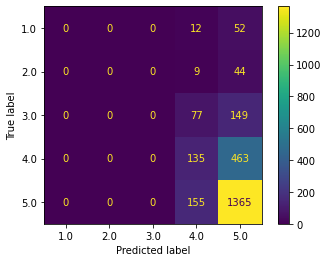

In [255]:
disp.plot();

#### Express the results from confusion matrix as percentages

In [256]:
cm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')

In [257]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels = logreg.classes_)

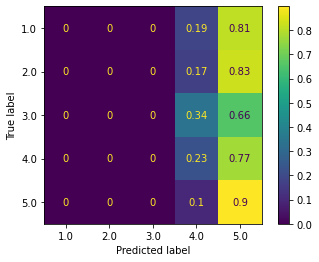

In [258]:
disp.plot();

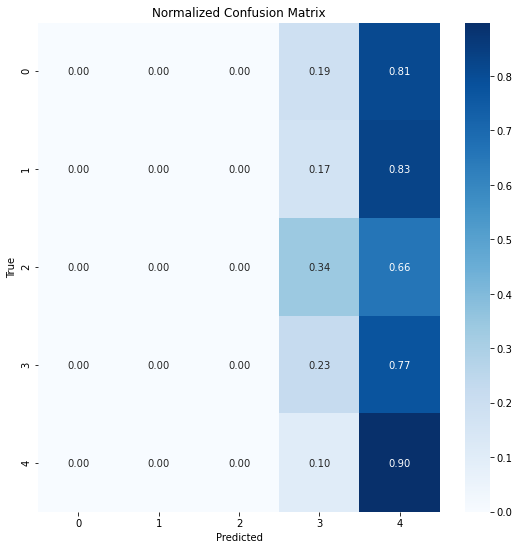

In [259]:
plt.figure(figsize = (9,9))
sns.heatmap(cm_norm, annot = True, fmt = ".2f", cmap = "Blues")
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True');

In [260]:
from sklearn.metrics import recall_score

In [261]:
recall_score(y_test, y_pred, average = 'micro')

0.609508329947176

In [262]:
recall_score(y_test, y_pred, average = None)

array([0.        , 0.        , 0.        , 0.22575251, 0.89802632])

#### Null model

In [263]:
y_test.value_counts(normalize = True).sort_values(ascending = False)

5.0    0.617635
4.0    0.242991
3.0    0.091833
1.0    0.026006
2.0    0.021536
Name: rating, dtype: float64

Since our recall score is only 61%, this model isn't really better than baseline (62% of our data set is 5-star reviews).

---
## K Nearest Neighbors

#### Let's set up our X and y variables again.

In [264]:
X = ride_reviews.drop(columns = ['ride', 'reviewer', 'review_title', 'review_text', 'rating', 'ta_stars', 'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens', 'age_interest_teens', 'open_date'])
y = ride_reviews['rating']

#### Drop the categorical columns

In [265]:
X.drop(columns = ['park_location', 'park_area'], inplace = True)

#### Create training and test sets

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [268]:
y_train.value_counts(normalize = True)

5.0    0.617854
4.0    0.243159
3.0    0.091574
1.0    0.025874
2.0    0.021539
Name: rating, dtype: float64

In [269]:
y_test.value_counts(normalize = True)

5.0    0.617635
4.0    0.242991
3.0    0.091833
1.0    0.026006
2.0    0.021536
Name: rating, dtype: float64

#### Use StandardScaler for preprocessing

In [270]:
from sklearn.preprocessing import StandardScaler

In [271]:
ss = StandardScaler()

In [272]:
X_train_scaled = ss.fit_transform(X_train)

In [273]:
X_test_scaled = ss.transform(X_test)

#### Use GridSearchCV to fit and score our model

In [274]:
from sklearn.neighbors import KNeighborsClassifier

In [275]:
params = {'n_neighbors': range(1, 40, 2)}

In [276]:
gs = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1)

In [277]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 40, 2)})

In [278]:
gs.score(X_train_scaled, y_train)

0.6337036033595231

In [279]:
gs.score(X_test_scaled, y_test)

0.6196668021129622

#### Score our model

In [280]:
from sklearn.metrics import recall_score

Source: https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary

In [281]:
recall_score(y_test, gs.predict(X_test_scaled), average = 'micro')

0.6196668021129622

In [282]:
recall_score(y_test, gs.predict(X_test_scaled), average = None)

array([0.        , 0.        , 0.07079646, 0.22909699, 0.90263158])

In [283]:
y_test.value_counts(normalize = True).sort_values(ascending = False)

5.0    0.617635
4.0    0.242991
3.0    0.091833
1.0    0.026006
2.0    0.021536
Name: rating, dtype: float64

Its accuracy for each rating is pretty good, but overall, not really any better than just guessing the most common value (5.0) every time.

#### Use a confusion matrix to visualize the model's performance

In [284]:
from sklearn.metrics import confusion_matrix

In [285]:
cm = confusion_matrix(y_test, gs.predict(X_test_scaled), normalize = 'true')

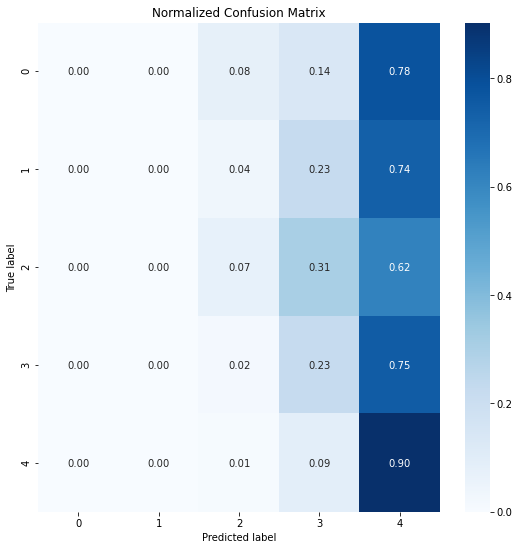

In [286]:
#using seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix');

#### Calculate baseline accuracy with a null model that just predicts the most frequent class


In [287]:
y_test.value_counts(normalize = True)

5.0    0.617635
4.0    0.242991
3.0    0.091833
1.0    0.026006
2.0    0.021536
Name: rating, dtype: float64

#### Evaluate the model

Can't rely on the accuracy score here because although it's mostly getting things right, overall it's also not any better than predicing 5 all the time.

#### What's the best parameter to use for number of neighbors?

In [288]:
gs.best_params_

{'n_neighbors': 39}

In [289]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108067,0.002997,0.256182,0.019898,1,{'n_neighbors': 1},0.598510,0.503047,0.490515,0.527778,0.546748,0.533320,0.037973,20
1,0.108790,0.013434,0.263401,0.035903,3,{'n_neighbors': 3},0.603250,0.517942,0.508130,0.533198,0.548780,0.542260,0.033468,19
2,0.123829,0.015387,0.274731,0.010850,5,{'n_neighbors': 5},0.605958,0.604604,0.600949,0.602304,0.606369,0.604037,0.002097,17
3,0.104678,0.011861,0.232418,0.012956,7,{'n_neighbors': 7},0.602573,0.620853,0.598916,0.591463,0.593496,0.601460,0.010461,18
4,0.095954,0.001918,0.226703,0.005431,9,{'n_neighbors': 9},0.613406,0.643873,0.615854,0.611111,0.619919,0.620832,0.011884,15
5,0.096356,0.006265,0.239537,0.012869,11,{'n_neighbors': 11},0.606635,0.639810,0.613144,0.602981,0.618564,0.616227,0.012951,16
6,0.096356,0.003064,0.229911,0.007248,13,{'n_neighbors': 13},0.614083,0.637779,0.617209,0.622629,0.630759,0.624492,0.008726,14
7,0.100667,0.005027,0.237632,0.007033,15,{'n_neighbors': 15},0.613406,0.638456,0.623306,0.623306,0.629404,0.625576,0.008234,13
8,0.096155,0.004987,0.234022,0.004187,17,{'n_neighbors': 17},0.612051,0.637102,0.629404,0.619241,0.630081,0.625576,0.008841,12
9,0.103775,0.006786,0.241442,0.006079,19,{'n_neighbors': 19},0.618145,0.637779,0.636179,0.625339,0.630081,0.629505,0.007208,7


In [290]:
results = pd.DataFrame(gs.cv_results_)[['param_n_neighbors', 'mean_test_score', 'std_test_score']].sort_values(by='param_n_neighbors')
results

,param_n_neighbors,mean_test_score,std_test_score
0,1,0.533320,0.037973
1,3,0.542260,0.033468
2,5,0.604037,0.002097
3,7,0.601460,0.010461
4,9,0.620832,0.011884
5,11,0.616227,0.012951
6,13,0.624492,0.008726
7,15,0.625576,0.008234
8,17,0.625576,0.008841
9,19,0.629505,0.007208


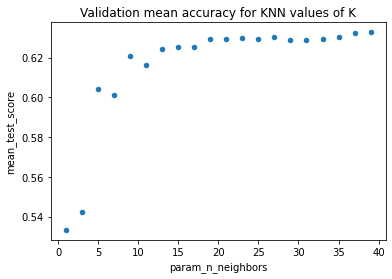

In [291]:
results.plot(
    kind='scatter', 
    x='param_n_neighbors', 
    y='mean_test_score', 
    title='Validation mean accuracy for KNN values of K'
);

Seems like it gets better the more neighbors we include, but the gains aren't really impressive enough go beyond even 9 neighbors, even though the best parameter was 39 neighbors.

---
## Random Forests

#### Define X and y and split into training and test

In [292]:
X = ride_reviews.drop(columns = ['ride', 'reviewer', 'review_title', 'review_text', 'rating', 'ta_stars', 'age_interest_preschoolers', 'age_interest_kids', 'age_interest_tweens', 'age_interest_teens', 'open_date'])
y = ride_reviews['rating']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 777)

In [294]:
y_test

1354    5.0
6468    5.0
9553    4.0
4480    4.0
6821    4.0
       ... 
8070    5.0
6902    5.0
3347    5.0
5664    5.0
6082    5.0
Name: rating, Length: 2461, dtype: float64

In [295]:
y_train.value_counts(normalize = True)

5.0    0.619344
4.0    0.243295
3.0    0.090219
1.0    0.025196
2.0    0.021945
Name: rating, dtype: float64

In [296]:
y_test.value_counts(normalize = True)

5.0    0.613165
4.0    0.242584
3.0    0.095896
1.0    0.028037
2.0    0.020317
Name: rating, dtype: float64

#### Pipeline to one hot encode and use RandomForestRegressor. 

In [297]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

#### Encode categorical variables (OHE).

In [298]:
pipe = make_pipeline(OneHotEncoder(use_cat_names=True), RandomForestRegressor(random_state=711))
pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=711))])

In [299]:
pipe.get_params()

{'memory': None,
 'steps': [('onehotencoder', OneHotEncoder(use_cat_names=True)),
  ('randomforestregressor', RandomForestRegressor(random_state=711))],
 'verbose': False,
 'onehotencoder': OneHotEncoder(use_cat_names=True),
 'randomforestregressor': RandomForestRegressor(random_state=711),
 'onehotencoder__cols': None,
 'onehotencoder__drop_invariant': False,
 'onehotencoder__handle_missing': 'value',
 'onehotencoder__handle_unknown': 'value',
 'onehotencoder__return_df': True,
 'onehotencoder__use_cat_names': True,
 'onehotencoder__verbose': 0,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min

In [300]:
param_grid = {'randomforestregressor__max_features': [5, 10]}

In [301]:
gs = GridSearchCV(estimator = pipe, param_grid = param_grid, n_jobs = -1)
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=711))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': [5, 10]})

In [302]:
gs.best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['park_location', 'park_area'],
                               use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=5, random_state=711))])

#### Estimating the importance of features in our model

Since we used a regression model here, the feature importance will tell us which features decreased mean squared error the most as a split determinant

In [303]:
importances = gs.best_estimator_.named_steps['randomforestregressor'].feature_importances_

In [304]:
encoded_cols = gs.best_estimator_.named_steps['onehotencoder'].get_feature_names()

In [305]:
encoded_cols

['park_location_Animal Kingdom',
 'park_location_Magic Kingdom',
 'park_location_Epcot',
 'park_location_Hollywood Studios',
 'park_area_Pandora',
 'park_area_Fantasyland',
 'park_area_Liberty Square',
 'park_area_Dinoland USA',
 'park_area_Future World',
 'park_area_Sunset Boulevard',
 'park_area_Tomorrowland',
 'park_area_Adventureland',
 'park_area_Toy Story Land',
 'park_area_Africa',
 'park_area_Main Street USA',
 'park_area_Frontierland',
 'park_area_Asia',
 'park_area_World Showcase',
 'park_area_Echo Lake',
 'ride_type_thrill',
 'ride_type_spinning',
 'ride_type_slow',
 'ride_type_small_drops',
 'ride_type_big_drops',
 'ride_type_dark',
 'ride_type_scary',
 'ride_type_water',
 'fast_pass',
 'classic',
 'age_interest_all',
 'age_interest_adults',
 'height_req_inches',
 'ride_duration_min',
 'age_of_ride_years']

In [306]:
pd.DataFrame(zip(encoded_cols, importances), columns = ['col_names', 'importances']).sort_values(by = 'importances', ascending = False)

,col_names,importances
31,height_req_inches,0.138576
33,age_of_ride_years,0.130531
32,ride_duration_min,0.108872
20,ride_type_spinning,0.069809
29,age_interest_all,0.058108
4,park_area_Pandora,0.035109
19,ride_type_thrill,0.034796
21,ride_type_slow,0.034308
22,ride_type_small_drops,0.033055
24,ride_type_dark,0.032581


Looks liks the height requirement, the age of the ride, and the ride duration were deemed to be most important.

In [307]:
gs.score(X_train, y_train)

0.15196885969650098

In [308]:
gs.score(X_test, y_test)

0.1555917237907667

Although that's interesting, it doesn't really matter though, since this model seems to be under-fitting.

---
## Random Forests with Boosting

Let's try boosting our model and switching to a classification model.

At least one study seemed to suggest that classification models worked better than regression models for predicting ratings.
Source: https://towardsdatascience.com/1-to-5-star-ratings-classification-or-regression-b0462708a4df

### Gradient Boosting Classification Trees

In [309]:
from sklearn.ensemble import GradientBoostingClassifier

In [310]:
X_train.head()

,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
1004,Animal Kingdom,Pandora,True,False,False,False,False,False,False,False,True,False,False,True,44,5.00,4.38
5812,Magic Kingdom,Fantasyland,True,False,False,True,False,False,False,False,True,False,False,True,38,2.50,7.38
2692,Magic Kingdom,Liberty Square,False,False,True,False,False,True,False,False,True,True,True,True,0,7.50,50.04
5404,Animal Kingdom,Dinoland USA,True,True,False,True,False,False,False,False,True,False,False,True,48,1.25,19.49
6533,Epcot,Future World,False,False,True,True,False,False,False,False,True,False,False,True,40,5.00,16.44


In [311]:
y_train.head()

1004    5.0
5812    5.0
2692    4.0
5404    3.0
6533    1.0
Name: rating, dtype: float64

In [312]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), GradientBoostingClassifier())

In [313]:
pipe.get_params()

{'memory': None,
 'steps': [('onehotencoder', OneHotEncoder(use_cat_names=True)),
  ('gradientboostingclassifier', GradientBoostingClassifier())],
 'verbose': False,
 'onehotencoder': OneHotEncoder(use_cat_names=True),
 'gradientboostingclassifier': GradientBoostingClassifier(),
 'onehotencoder__cols': None,
 'onehotencoder__drop_invariant': False,
 'onehotencoder__handle_missing': 'value',
 'onehotencoder__handle_unknown': 'value',
 'onehotencoder__return_df': True,
 'onehotencoder__use_cat_names': True,
 'onehotencoder__verbose': 0,
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'g

In [314]:
params = {'gradientboostingclassifier__max_features': [3,5],
         'gradientboostingclassifier__min_samples_leaf': range(2,8)}

In [315]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [316]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_features': [3, 5],
                         'gradientboostingclassifier__min_samples_leaf': range(2, 8)})

In [317]:
gs.score(X_train, y_train)

0.635329179084259

In [318]:
gs.score(X_test, y_test)

0.6216984965461194

#### Let's try adjusting our parameters

In [319]:
params = {'gradientboostingclassifier__max_features': [7,9],
         'gradientboostingclassifier__min_samples_leaf': range(10, 20)}

In [320]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [321]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_features': [7, 9],
                         'gradientboostingclassifier__min_samples_leaf': range(10, 20)})

In [322]:
gs.score(X_train, y_train)

0.635058249796803

In [323]:
gs.score(X_test, y_test)

0.6216984965461194

#### Let's adjust our parameters one more time

In [324]:
params = {'gradientboostingclassifier__max_features': [5,7],
         'gradientboostingclassifier__min_samples_leaf': range(8,12)}

In [325]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [326]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_features': [5, 7],
                         'gradientboostingclassifier__min_samples_leaf': range(8, 12)})

In [327]:
gs.score(X_train, y_train)

0.6343809265781631

In [328]:
gs.score(X_test, y_test)

0.6200731409995937

Switching to classification didn't really seem to make much of a difference at all... maybe we can try regression again, with the boost?

### Gradient Boosting Regression Trees

In [329]:
from sklearn.ensemble import GradientBoostingRegressor

In [330]:
X_train.head()

,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,ride_type_small_drops,ride_type_big_drops,ride_type_dark,ride_type_scary,ride_type_water,fast_pass,classic,age_interest_all,age_interest_adults,height_req_inches,ride_duration_min,age_of_ride_years
1004,Animal Kingdom,Pandora,True,False,False,False,False,False,False,False,True,False,False,True,44,5.00,4.38
5812,Magic Kingdom,Fantasyland,True,False,False,True,False,False,False,False,True,False,False,True,38,2.50,7.38
2692,Magic Kingdom,Liberty Square,False,False,True,False,False,True,False,False,True,True,True,True,0,7.50,50.04
5404,Animal Kingdom,Dinoland USA,True,True,False,True,False,False,False,False,True,False,False,True,48,1.25,19.49
6533,Epcot,Future World,False,False,True,True,False,False,False,False,True,False,False,True,40,5.00,16.44


In [331]:
y_train.head()

1004    5.0
5812    5.0
2692    4.0
5404    3.0
6533    1.0
Name: rating, dtype: float64

In [332]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), GradientBoostingRegressor())

In [333]:
pipe.get_params()

{'memory': None,
 'steps': [('onehotencoder', OneHotEncoder(use_cat_names=True)),
  ('gradientboostingregressor', GradientBoostingRegressor())],
 'verbose': False,
 'onehotencoder': OneHotEncoder(use_cat_names=True),
 'gradientboostingregressor': GradientBoostingRegressor(),
 'onehotencoder__cols': None,
 'onehotencoder__drop_invariant': False,
 'onehotencoder__handle_missing': 'value',
 'onehotencoder__handle_unknown': 'value',
 'onehotencoder__return_df': True,
 'onehotencoder__use_cat_names': True,
 'onehotencoder__verbose': 0,
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impur

In [334]:
params = {'gradientboostingregressor__max_features': [3,5],
         'gradientboostingregressor__min_samples_leaf': range(2,8)}

In [335]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [336]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_features': [3, 5],
                         'gradientboostingregressor__min_samples_leaf': range(2, 8)})

In [337]:
gs.score(X_train, y_train)

0.14643010649098975

In [338]:
gs.score(X_test, y_test)

0.1490410594237196

Hmm... really didn't make any difference relative to the unboosted regression forest. Let's try again, maybe?

#### Let's try adjusting our parameters

In [339]:
params = {'gradientboostingregressor__max_features': [7,9],
         'gradientboostingregressor__min_samples_leaf': range(10, 20)}

In [340]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [341]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_features': [7, 9],
                         'gradientboostingregressor__min_samples_leaf': range(10, 20)})

In [342]:
gs.score(X_train, y_train)

0.1485355066171964

In [343]:
gs.score(X_test, y_test)

0.15515577875779274

#### Let's adjust our parameters one more time

In [344]:
params = {'gradientboostingregressor__max_features': [5,7],
         'gradientboostingregressor__min_samples_leaf': range(8,12)}

In [345]:
gs = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1)

In [346]:
gs.fit(X_train, y_train)

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_features': [5, 7],
                         'gradientboostingregressor__min_samples_leaf': range(8, 12)})

In [347]:
gs.score(X_train, y_train)

0.148050142175304

In [348]:
gs.score(X_test, y_test)

0.15429454803427467

Nope. Random forests don't seem to be working out either, even with boosting.

Maybe we'd have better luck bringing in textual data from the review titles and bodies into a sentiment analysis model?

---
## Natural Language Processing

### Tokenization 

Let's break up the titles and reviews into individual words (tokens).

In [349]:
ride_reviews['tokenized_title'] = [i for i in ride_reviews['review_title'].str.split()]

In [350]:
ride_reviews.head()

,ride,reviewer,review_title,review_text,rating,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,...,age_interest_kids,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars,tokenized_title
0,Astro Orbiter,Courtenay O,Short & sweet ride to space!,This ride brings me closer to the sky than any...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Short, &, sweet, ride, to, space!]"
1,Astro Orbiter,Love2Travel100,Fun both day and night,Recommend riding both in the day and at night ...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Fun, both, day, and, night]"
2,Astro Orbiter,Logan C,Zippy,Much faster than I remember as a child. Defini...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,0,1.5,1995-02-25,26.63,3.5,[Zippy]
3,Astro Orbiter,Logan C,Fun,It’s a lot zippier than I remember.. That bein...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,0,1.5,1995-02-25,26.63,3.5,[Fun]
4,Astro Orbiter,Mark Barnes,Fun view of the park,Not a fast ride but you do get a very good vie...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Fun, view, of, the, park]"


In [351]:
ride_reviews['tokenized_text'] = [i for i in ride_reviews['review_text'].str.split()]

In [352]:
ride_reviews.head()

,ride,reviewer,review_title,review_text,rating,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,...,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars,tokenized_title,tokenized_text
0,Astro Orbiter,Courtenay O,Short & sweet ride to space!,This ride brings me closer to the sky than any...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Short, &, sweet, ride, to, space!]","[This, ride, brings, me, closer, to, the, sky,..."
1,Astro Orbiter,Love2Travel100,Fun both day and night,Recommend riding both in the day and at night ...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Fun, both, day, and, night]","[Recommend, riding, both, in, the, day, and, a..."
2,Astro Orbiter,Logan C,Zippy,Much faster than I remember as a child. Defini...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,[Zippy],"[Much, faster, than, I, remember, as, a, child..."
3,Astro Orbiter,Logan C,Fun,It’s a lot zippier than I remember.. That bein...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,[Fun],"[It’s, a, lot, zippier, than, I, remember.., T..."
4,Astro Orbiter,Mark Barnes,Fun view of the park,Not a fast ride but you do get a very good vie...,4.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Fun, view, of, the, park]","[Not, a, fast, ride, but, you, do, get, a, ver..."


#### How long are our reviews?

In [353]:
title_length = [len(tokens) for tokens in ride_reviews['tokenized_title']]

In [354]:
review_length = [len(tokens) for tokens in ride_reviews['tokenized_text']]

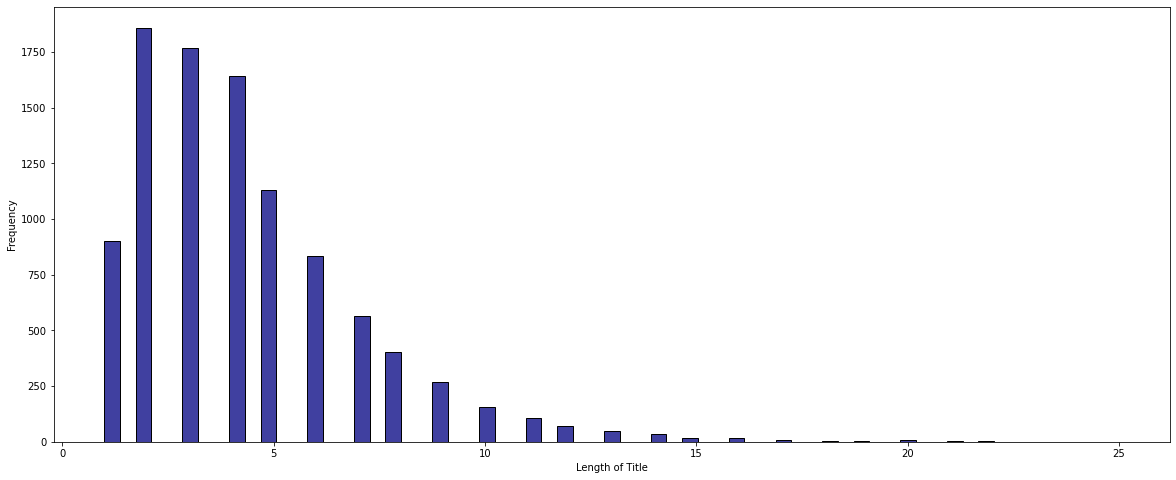

In [355]:
plt.figure(figsize=(20,8))
sns.histplot(title_length, color = 'navy')
plt.xlabel('Length of Title')
plt.ylabel('Frequency');

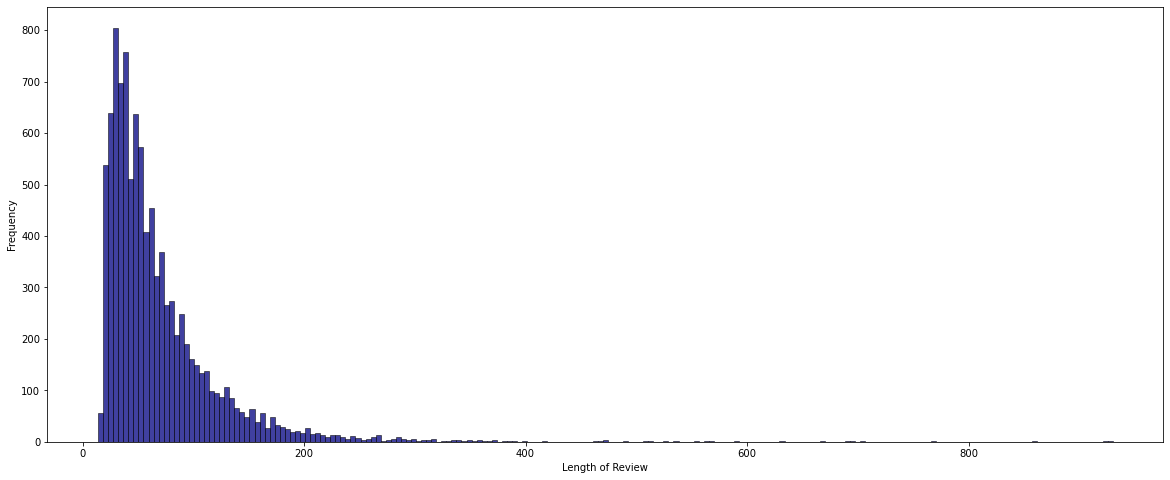

In [356]:
plt.figure(figsize=(20,8))
sns.histplot(review_length, color = 'navy')
plt.xlabel('Length of Review')
plt.ylabel('Frequency');

#### Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [357]:
ride_reviews_best_worst = ride_reviews[(ride_reviews['rating'] == 5) | (ride_reviews['rating'] == 1)]

In [358]:
ride_reviews_best_worst.head()

,ride,reviewer,review_title,review_text,rating,park_location,park_area,ride_type_thrill,ride_type_spinning,ride_type_slow,...,age_interest_tweens,age_interest_teens,age_interest_adults,height_req_inches,ride_duration_min,open_date,age_of_ride_years,ta_stars,tokenized_title,tokenized_text
0,Astro Orbiter,Courtenay O,Short & sweet ride to space!,This ride brings me closer to the sky than any...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Short, &, sweet, ride, to, space!]","[This, ride, brings, me, closer, to, the, sky,..."
5,Astro Orbiter,Carolyn Therkelsen,One of our favorites!,We always enjoyed going on this ride each time...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[One, of, our, favorites!]","[We, always, enjoyed, going, on, this, ride, e..."
15,Astro Orbiter,ElizaGN,Worst ride ever.,This was like a cheap carnival ride. You crowd...,1.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Worst, ride, ever.]","[This, was, like, a, cheap, carnival, ride., Y..."
26,Astro Orbiter,Love2Travel100,Awesome ride day and night,This ride does have a long line so we head her...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[Awesome, ride, day, and, night]","[This, ride, does, have, a, long, line, so, we..."
28,Astro Orbiter,James T,good old ride,nice old space rocket ride.\noldie carnival ty...,5.0,Magic Kingdom,Tomorrowland,False,True,True,...,True,True,True,0,1.5,1995-02-25,26.63,3.5,"[good, old, ride]","[nice, old, space, rocket, ride., oldie, carni..."


In [359]:
ride_reviews_best_worst['rating'].unique()

array([5., 1.])

#### Define X and y.

In [360]:
X = ride_reviews_best_worst['review_text']
y = ride_reviews_best_worst['rating']

In [361]:
X.shape

(6336,)

In [362]:
y.shape

(6336,)

In [363]:
y.value_counts(normalize = True)

5.0    0.959754
1.0    0.040246
Name: rating, dtype: float64

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

---
### CountVectorizer

#### Use CountVectorizer to convert review text into word counts from X_train and X_test to create document-term matrices (dtm).

In [365]:
from sklearn.feature_extraction.text import CountVectorizer

In [366]:
vect = CountVectorizer()

In [367]:
X_train_dtm = vect.fit_transform(X_train)

In [368]:
X_test_dtm = vect.transform(X_test)

In [369]:
X_train_dtm

<4752x10064 sparse matrix of type '<class 'numpy.int64'>'
	with 229196 stored elements in Compressed Sparse Row format>

In [370]:
X_train_dtm.shape

(4752, 10064)

We have 4,752 TripAdvisor reviews in our training set, and 10,064 unique words were found across all documents.

CountVectorizer makes all words lowercase automatically.

Without this, we'd have about 2,000 more words. Since case won't matter, we're going to leave the defaults in place in order to have fewer words.


---
### Multinomial Naive Bayes

**Use CountVectorizer with a Multinomial Naive Bayes model to predict the star rating.**

Process text features with CountVectorizer, fit a Naive Bayes model, then score the model.

#### Use default options for CountVectorizer.

In [371]:
vect = CountVectorizer()

In [372]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [373]:
from sklearn.naive_bayes import MultinomialNB

In [374]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

#### Evaluate

In [375]:
nb.score(X_test_dtm, y_test)

0.9608585858585859

Our accuracy rate is 96%! But is that the whole story?...

#### Create a confusion matrix to double-check

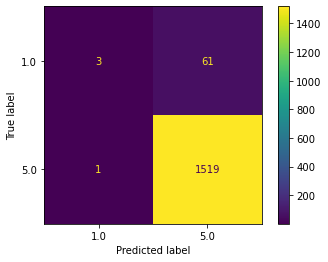

In [376]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, X_test_dtm, y_test);

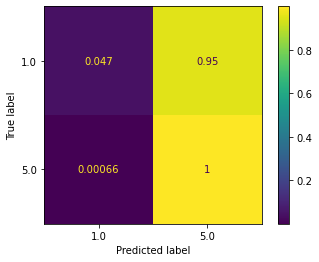

In [377]:
#normalize in order to see the percentages
plot_confusion_matrix(nb, X_test_dtm, y_test, normalize = 'true');

In [378]:
y_test.value_counts(normalize = True)

5.0    0.959596
1.0    0.040404
Name: rating, dtype: float64

Sigh... it's labeling just about everything as a 5-star rating. It got 95% of the 1-star ratings wrong!

Maybe it's because there's so few 1-star reviews (255) relative to 5-star reviews (6,081) in the data set?

Looks like there's only 64 1-star reviews in the entire test set.

#### Balanced Accuracy Score

Since we have imbalanced data, let's use balanced accuracy to give us the the average accuracy for each class.

In [379]:
from sklearn.metrics import balanced_accuracy_score

In [380]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.523108552631579

Doh! We're pretty much just doing a 50-50 coin toss overall since we're guessing 5-star reviews about 100% of the time.

---
### Tokenization Returns!

Unigrams, Bigrams, and Trigrams!

#### Let's create a feature matrix with different combinations of unigrams, bigrams, and trigrams

**bigrams only**

In [381]:
vect_bigrams = CountVectorizer(ngram_range=(2,2))

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [383]:
X_train_dtm = vect_bigrams.fit_transform(X_train)
X_test_dtm = vect_bigrams.transform(X_test)

In [384]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [385]:
nb.score(X_test_dtm, y_test)

0.9595959595959596

In [386]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.5

**trigrams only**

In [387]:
vect_trigrams = CountVectorizer(ngram_range=(3,3))

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [389]:
X_train_dtm = vect_trigrams.fit_transform(X_train)
X_test_dtm = vect_trigrams.transform(X_test)

In [390]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [391]:
nb.score(X_test_dtm, y_test)

0.9608585858585859

In [392]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.515625

**unigrams and bigrams**

In [393]:
vect_uni_bi = CountVectorizer(ngram_range=(1,2))

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [395]:
X_train_dtm = vect_uni_bi.fit_transform(X_train)
X_test_dtm = vect_uni_bi.transform(X_test)

In [396]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [397]:
nb.score(X_test_dtm, y_test)

0.9595959595959596

In [398]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.5

**bigrams and trigrams**

In [399]:
vect_bi_tri = CountVectorizer(ngram_range=(2,3))

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [401]:
X_train_dtm = vect_bi_tri.fit_transform(X_train)
X_test_dtm = vect_bi_tri.transform(X_test)

In [402]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [403]:
nb.score(X_test_dtm, y_test)

0.9595959595959596

In [404]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.5

**unigrams, bigrams, and trigrams**

In [405]:
vect_all = CountVectorizer(ngram_range=(1,3))

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [407]:
X_train_dtm = vect_all.fit_transform(X_train)
X_test_dtm = vect_all.transform(X_test)

In [408]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [409]:
nb.score(X_test_dtm, y_test)

0.9595959595959596

In [410]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.5

Different word combinations made no difference in the accuracy or balanced accuracy of our model - sometimes it made it slightly worse.

---
### Let's try reducing the number of features

Either ones that occurring too rarely, or too often.

**dropping tokens (words) that don't appear in at least 2 documents**

In [411]:
vect_min_2 = CountVectorizer(min_df = 2)

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [413]:
X_train_dtm = vect_min_2.fit_transform(X_train)
X_test_dtm = vect_min_2.transform(X_test)

In [414]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [415]:
nb.score(X_test_dtm, y_test)

0.9690656565656566

In [416]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.6471217105263158

**dropping tokens (words) that don't appear in at least 3 documents**

In [417]:
vect_min_3 = CountVectorizer(min_df = 3)

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [419]:
X_train_dtm = vect_min_3.fit_transform(X_train)
X_test_dtm = vect_min_3.transform(X_test)

In [420]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [421]:
nb.score(X_test_dtm, y_test)

0.9728535353535354

In [422]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.7089638157894738

**dropping tokens (words) that don't appear in at least 10 documents**

In [423]:
vect_min_10 = CountVectorizer(min_df = 10)

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [425]:
X_train_dtm = vect_min_10.fit_transform(X_train)
X_test_dtm = vect_min_10.transform(X_test)

In [426]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [427]:
nb.score(X_test_dtm, y_test)

0.9621212121212122

In [428]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.7557565789473684

**dropping tokens (words) that don't appear in at least 20 documents**

In [429]:
vect_min_20 = CountVectorizer(min_df = 20)

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [431]:
X_train_dtm = vect_min_20.fit_transform(X_train)
X_test_dtm = vect_min_20.transform(X_test)

In [432]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [433]:
nb.score(X_test_dtm, y_test)

0.9551767676767676

In [434]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.7296875

**dropping tokens (words) that appear in at least 2 documents**

In [435]:
vect_max_2 = CountVectorizer(max_df = 2)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [437]:
X_train_dtm = vect_max_2.fit_transform(X_train)
X_test_dtm = vect_max_2.transform(X_test)

In [438]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [439]:
nb.score(X_test_dtm, y_test)

0.9589646464646465

In [440]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.5146381578947368

**dropping tokens (words) that appear in at least 500 documents**

In [441]:
vect_max_500 = CountVectorizer(max_df = 500)

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [443]:
X_train_dtm = vect_max_500.fit_transform(X_train)
X_test_dtm = vect_max_500.transform(X_test)

In [444]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [445]:
nb.score(X_test_dtm, y_test)

0.9646464646464646

In [446]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.569983552631579

It looks like dropping rare words is having a stronger effect on the accuracy of our model than words that appear more commonly.

Up to a point, anyway. A min_df of 10 did better than a min_df of 20. The min_df of 10 has done the the best so far - a balanced score of 76%.

---
### Stop Words

Dropping rare words seemed to work pretty well.

Dropping common words didn't, but maybe if we dropped the _right_ common words, then it would be beneficial.

Let's try the stop words function to see if removing a curated list of common English words will do better.

In [447]:
vect_stop = CountVectorizer(stop_words = 'english')

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [449]:
X_train_dtm = vect_stop.fit_transform(X_train)
X_test_dtm = vect_stop.transform(X_test)

In [450]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [451]:
nb.score(X_test_dtm, y_test)

0.9646464646464646

In [452]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.569983552631579

Hmm... this is better than a vanilla vectorizer, but still didn't beat our min_df of 10.

Let's see what would happen if we combined it with our min_df of 10.

In [453]:
vect_stop_min10 = CountVectorizer(stop_words = 'english', min_df = 10)

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 711)

In [455]:
X_train_dtm = vect_stop_min10.fit_transform(X_train)
X_test_dtm = vect_stop_min10.transform(X_test)

In [456]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [457]:
nb.score(X_test_dtm, y_test)

0.9646464646464646

In [458]:
balanced_accuracy_score(y_test, nb.predict(X_test_dtm))

0.7271381578947369

That's pretty good, but still doesn't beat the balanced acuracy of min_df 10 alone! (76%)

___

## Use a Pipeline with GridSearchCV

Let's stop guessing and manually testing out different hyperparameters and just use grid search with a pipeline to help automate the work of finding our ideal settings.

### CountVectorizer with Logistic Regression

#### Create a pipeline function and give it the transformers and estimators we want to use.

In [459]:
pipe_log = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=10_000))
pipe_log

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

#### Get all the params we can adjust

In [460]:
pipe_log.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer()),
  ('logisticregression', LogisticRegression(max_iter=10000))],
 'verbose': False,
 'countvectorizer': CountVectorizer(),
 'logisticregression': LogisticRegression(max_iter=10000),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticre

In [461]:
grid_params_log = {
    'countvectorizer__lowercase': [True, False],
    'countvectorizer__min_df': [1, 5, 10],
    'countvectorizer__ngram_range': [(1,2)],
    'countvectorizer__stop_words': [None, 'english'],
    'logisticregression__C' : [0.1, 1, 10, 100]
}

In [462]:
gs_log = GridSearchCV(estimator = pipe_log, param_grid = grid_params_log, n_jobs = -1)

In [463]:
gs_log

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'logisticregression__C': [0.1, 1, 10, 100]})

In [464]:
gs_log.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'logisticregression__C': [0.1, 1, 10, 100]})

In [465]:
gs_log.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__min_df': 5,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__stop_words': 'english',
 'logisticregression__C': 10}

### Score our test set.

In [466]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

In [467]:
gs_log.score(X_test, y_test)

0.9703282828282829

In [468]:
preds_log = gs_log.predict(X_test)

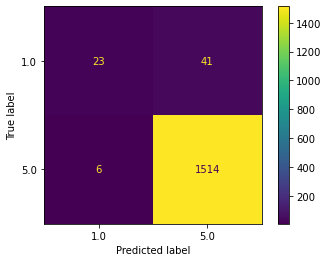

In [469]:
plot_confusion_matrix(gs_log, X_test, y_test);

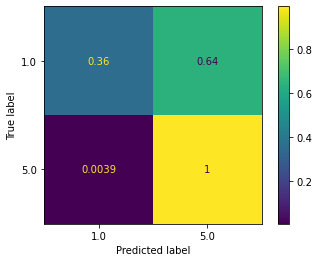

In [470]:
plot_confusion_matrix(gs_log, X_test, y_test, normalize = 'true');

#### Correct 5-star reviews

In [471]:
precision_score(y_test, preds_log)

0.7931034482758621

79% of all 5-star predictions were correct.

#### Correct 1-star reviews

In [472]:
recall_score(y_test, preds_log)

0.359375

Only 36% of 1-star reviews were correctly identified.

#### Overall Performance

In [473]:
f1_score(y_test, preds_log)

0.4946236559139785

In [474]:
balanced_accuracy_score(y_test, preds_log)

0.6777138157894738

Only has about 49% accuracy according to f1, but balanced accuracy score is 68%.

#### Identify the words that most clearly allow the model to identify a review as positive (5-star) or negative (1-star)

In [475]:
gs_log.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=10000))])

In [476]:
gs_log.best_estimator_.named_steps

{'countvectorizer': CountVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english'),
 'logisticregression': LogisticRegression(C=10, max_iter=10000)}

In [477]:
gs_log.best_estimator_.named_steps['logisticregression']

LogisticRegression(C=10, max_iter=10000)

In [478]:
type(gs_log.best_estimator_.named_steps['logisticregression'])

sklearn.linear_model._logistic.LogisticRegression

In [479]:
coefs_log = gs_log.best_estimator_.named_steps['logisticregression'].coef_

In [480]:
coefs_log

array([[ 0.12021305,  0.1124133 ,  0.00158199, ..., -0.37999354,
         0.07416182,  0.03179389]])

In [481]:
tokens_log = gs_log.best_estimator_.named_steps['countvectorizer'].get_feature_names()

In [482]:
coefs_log.flatten()

array([ 0.12021305,  0.1124133 ,  0.00158199, ..., -0.37999354,
        0.07416182,  0.03179389])

In [483]:
coefs_log_df = pd.DataFrame(coefs_log.flatten(), tokens_log)

In [484]:
coefs_log_df.sort_values(by = 0)

,0
boring,-3.667130
poor,-2.953340
waste,-2.871824
money,-2.776897
worst,-2.596002
...,...
classic,1.575069
great,1.587399
best,1.696945
amazing,1.846825


In [485]:
negative_words_log = coefs_log_df.sort_values(by = 0).head(50)
negative_words_log

,0
boring,-3.667130
poor,-2.953340
waste,-2.871824
money,-2.776897
worst,-2.596002
breaking,-2.470273
55,-2.141151
awful,-2.088805
recover,-2.063510
skip,-1.969993


In [548]:
positive_words_log = coefs_log_df.sort_values(by = 0, ascending = False).head(50)
positive_words_log

,0
loved,1.942935
amazing,1.846825
best,1.696945
great,1.587399
classic,1.575069
enjoyed,1.533735
awesome,1.481636
love,1.391646
beautiful,1.299003
great ride,1.227289


Our logistic regression model is not very strong, so let's go back to multinomials to see if we can adjust the parameters to make it any more accurate.

The words it picked up on though are pretty impressive. It's a real shame the model itself isn't very accurate, since this is a really interesting set of positive and negative words.

---
### CountVectorizer with Multinomial Naive Bayes

#### Pass the pipeline function the transformers and estimators you want it to use, in order

In [487]:
pipe_nb = make_pipeline(CountVectorizer(), MultinomialNB())
pipe_nb

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

#### Get all the params we can adjust

In [488]:
pipe_nb.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer()),
  ('multinomialnb', MultinomialNB())],
 'verbose': False,
 'countvectorizer': CountVectorizer(),
 'multinomialnb': MultinomialNB(),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'multinomialnb__alpha': 1.0,
 'multinomialnb__class_prior': None,
 'multinomialnb__fit_prior': True}

In [489]:
grid_params_nb = {
    'countvectorizer__lowercase': [True, False],
    'countvectorizer__min_df': [1,5,10],
    'countvectorizer__ngram_range': [(1,2)],
    'countvectorizer__stop_words': [None, 'english'],
    'multinomialnb__alpha': [0.1, 1, 10, 100]
}

In [490]:
gs_nb = GridSearchCV(estimator = pipe_nb, param_grid = grid_params_nb, n_jobs = -1)

In [491]:
gs_nb

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'multinomialnb__alpha': [0.1, 1, 10, 100]})

In [492]:
gs_nb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'multinomialnb__alpha': [0.1, 1, 10, 100]})

In [493]:
gs_nb.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__min_df': 5,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__stop_words': None,
 'multinomialnb__alpha': 0.1}

In [494]:
results = pd.DataFrame(gs_nb.cv_results_)

In [495]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__lowercase,param_countvectorizer__min_df,param_countvectorizer__ngram_range,param_countvectorizer__stop_words,param_multinomialnb__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.826170,0.108816,0.250665,0.028301,True,1,"(1, 2)",None,0.1,"{'countvectorizer__lowercase': True, 'countvec...",0.968454,0.964248,0.968421,0.967368,0.968421,0.967383,0.001621,12
1,1.755770,0.094452,0.248159,0.014826,True,1,"(1, 2)",None,1,"{'countvectorizer__lowercase': True, 'countvec...",0.960042,0.958991,0.960000,0.960000,0.960000,0.959807,0.000408,23
2,1.743226,0.068562,0.250465,0.021393,True,1,"(1, 2)",None,10,"{'countvectorizer__lowercase': True, 'countvec...",0.960042,0.958991,0.960000,0.960000,0.960000,0.959807,0.000408,23
3,1.633630,0.041828,0.264400,0.038067,True,1,"(1, 2)",None,100,"{'countvectorizer__lowercase': True, 'countvec...",0.960042,0.958991,0.960000,0.960000,0.960000,0.959807,0.000408,23
4,1.098711,0.056754,0.176468,0.015021,True,1,"(1, 2)",english,0.1,"{'countvectorizer__lowercase': True, 'countvec...",0.969506,0.964248,0.968421,0.968421,0.965263,0.967172,0.002038,14


In [496]:
results[(results['param_countvectorizer__lowercase'] == True) & (results['param_countvectorizer__min_df'] == 5) & (results['param_countvectorizer__ngram_range'] == (1,2)) & (results['param_multinomialnb__alpha'] == 0.1)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__lowercase,param_countvectorizer__min_df,param_countvectorizer__ngram_range,param_countvectorizer__stop_words,param_multinomialnb__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.252615,0.014799,0.242141,0.008724,True,5,"(1, 2)",None,0.1,"{'countvectorizer__lowercase': True, 'countvec...",0.974763,0.973712,0.974737,0.975789,0.969474,0.973695,0.002211,1
12,0.806034,0.020732,0.156816,0.002504,True,5,"(1, 2)",english,0.1,"{'countvectorizer__lowercase': True, 'countvec...",0.964248,0.971609,0.974737,0.975789,0.969474,0.971171,0.004124,3


### Score our test set.

In [497]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

In [498]:
gs_nb.score(X_test, y_test)

0.9785353535353535

In [499]:
preds_nb = gs_nb.predict(X_test)

In [500]:
from sklearn.metrics import plot_confusion_matrix

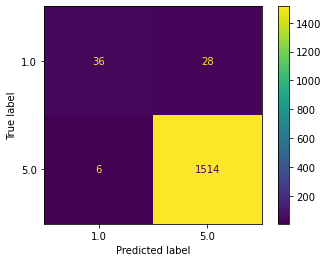

In [501]:
plot_confusion_matrix(gs_nb, X_test, y_test);

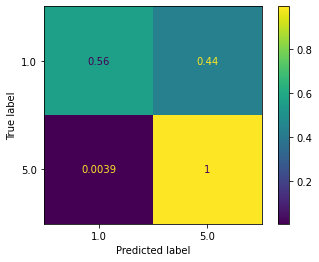

In [502]:
plot_confusion_matrix(gs_nb, X_test, y_test, normalize = 'true');

#### Correct 5-star reviews

In [503]:
precision_score(y_test, preds_nb)

0.8571428571428571

86% of all 5-star predictions were correct.

#### Correct 1-star reviews

In [504]:
recall_score(y_test, preds_nb)

0.5625

Only 56% of 1-star reviews were correctly identified.

#### Overall Performance

In [505]:
f1_score(y_test, preds_nb)

0.6792452830188678

In [506]:
balanced_accuracy_score(y_test, preds_nb)

0.7792763157894738

Only has about 68% accuracy according to f1, but balanced accuracy score is 78%.

#### Identify the words that most clearly allow the model to identify a review as positive (5-star) or negative (1-star)

Obtain the multinomial nb model coefficients.

In [507]:
gs_nb.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [508]:
gs_nb.best_estimator_.named_steps

{'countvectorizer': CountVectorizer(min_df=5, ngram_range=(1, 2)),
 'multinomialnb': MultinomialNB(alpha=0.1)}

In [509]:
gs_nb.best_estimator_.named_steps['multinomialnb']

MultinomialNB(alpha=0.1)

In [510]:
type(gs_nb.best_estimator_.named_steps['multinomialnb'])

sklearn.naive_bayes.MultinomialNB

In [511]:
coefs_nb = gs_nb.best_estimator_.named_steps['multinomialnb'].coef_

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [512]:
coefs_nb

array([[-10.64744302, -10.40821333, -11.42514759, ..., -11.42514759,
        -11.42514759, -10.84611372]])

In [513]:
tokens_nb = gs_nb.best_estimator_.named_steps['countvectorizer'].get_feature_names()

In [514]:
coefs_nb.flatten()

array([-10.64744302, -10.40821333, -11.42514759, ..., -11.42514759,
       -11.42514759, -10.84611372])

In [515]:
coefs_nb_df = pd.DataFrame(coefs_nb.flatten(), tokens_nb)

In [516]:
coefs_nb_df

,0
00,-10.647443
000,-10.408213
05,-11.425148
10,-7.984855
10 15,-11.094293
...,...
zone tv,-11.425148
zoo,-10.053668
zoo and,-11.425148
zorg,-11.425148


In [517]:
negative_words_nb = coefs_nb_df.sort_values(by = 0).head(50)
negative_words_nb

,0
torture,-15.356973
boring ride,-15.356973
waste of,-15.356973
dangerous,-12.959078
stupid,-12.959078
wasted,-12.959078
very disappointed,-12.959078
for such,-12.312451
felt sick,-12.312451
breaking down,-12.312451


In [549]:
positive_words_nb = coefs_nb_df.sort_values(by = 0, ascending = False).head(50)
positive_words_nb

,0
the,-3.259037
and,-3.951733
it,-4.068430
ride,-4.098153
to,-4.146492
you,-4.231904
is,-4.315316
this,-4.445875
of,-4.457257
in,-4.681042


---
### CountVectorizer with Multinomial Naive Bayes Attempt 2

The words we got with our optimal naive bays model didn't result in a very interesting set of determining words like we got with our logistic regression model.

Let's try removing English stop words to see if that gives us a better list, with a less steep decline in accuracy than switching to a logistic regression model.

#### Pass the pipeline function the transformers and estimators you want it to use, in order

In [519]:
pipe_nb_2 = make_pipeline(CountVectorizer(), MultinomialNB())
pipe_nb_2

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

#### Get all the params we can adjust

In [520]:
pipe_nb_2.get_params()

{'memory': None,
 'steps': [('countvectorizer', CountVectorizer()),
  ('multinomialnb', MultinomialNB())],
 'verbose': False,
 'countvectorizer': CountVectorizer(),
 'multinomialnb': MultinomialNB(),
 'countvectorizer__analyzer': 'word',
 'countvectorizer__binary': False,
 'countvectorizer__decode_error': 'strict',
 'countvectorizer__dtype': numpy.int64,
 'countvectorizer__encoding': 'utf-8',
 'countvectorizer__input': 'content',
 'countvectorizer__lowercase': True,
 'countvectorizer__max_df': 1.0,
 'countvectorizer__max_features': None,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 1),
 'countvectorizer__preprocessor': None,
 'countvectorizer__stop_words': None,
 'countvectorizer__strip_accents': None,
 'countvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'countvectorizer__tokenizer': None,
 'countvectorizer__vocabulary': None,
 'multinomialnb__alpha': 1.0,
 'multinomialnb__class_prior': None,
 'multinomialnb__fit_prior': True}

In [521]:
grid_params_nb_2 = {
    'countvectorizer__lowercase': [True, False],
    'countvectorizer__min_df': [1,5,10],
    'countvectorizer__ngram_range': [(1,2)],
    'countvectorizer__stop_words': ['english'],
    'multinomialnb__alpha': [0.1, 1, 10, 100]
}

In [522]:
gs_nb_2 = GridSearchCV(estimator = pipe_nb_2, param_grid = grid_params_nb_2, n_jobs = -1)

In [523]:
gs_nb_2

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': ['english'],
                         'multinomialnb__alpha': [0.1, 1, 10, 100]})

In [524]:
gs_nb_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__min_df': [1, 5, 10],
                         'countvectorizer__ngram_range': [(1, 2)],
                         'countvectorizer__stop_words': ['english'],
                         'multinomialnb__alpha': [0.1, 1, 10, 100]})

In [525]:
gs_nb_2.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__min_df': 5,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__stop_words': 'english',
 'multinomialnb__alpha': 0.1}

### Score our test set.

In [526]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

In [527]:
gs_nb_2.score(X_test, y_test)

0.9715909090909091

In [528]:
preds_nb_2 = gs_nb_2.predict(X_test)

In [529]:
from sklearn.metrics import plot_confusion_matrix

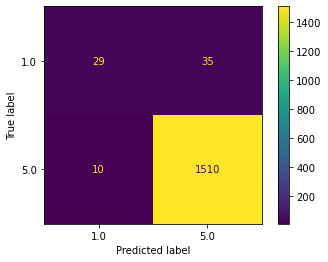

In [530]:
plot_confusion_matrix(gs_nb_2, X_test, y_test);

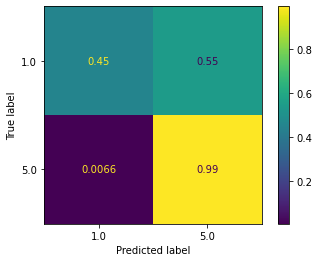

In [531]:
plot_confusion_matrix(gs_nb_2, X_test, y_test, normalize = 'true');

#### Correct 5-star reviews

In [532]:
precision_score(y_test, preds_nb_2)

0.7435897435897436

74% of all 5-star predictions were correct.

#### Correct 1-star reviews

In [533]:
recall_score(y_test, preds_nb_2)

0.453125

Only 45% of 1-star reviews were correctly identified.

#### Overall Performance

In [534]:
f1_score(y_test, preds_nb_2)

0.5631067961165049

In [535]:
balanced_accuracy_score(y_test, preds_nb_2)

0.7232730263157895

Only has about 56% accuracy according to f1, but balanced accuracy score is 72%.

#### Identify the words that most clearly allow the model to identify a review as positive (5-star) or negative (1-star)

Obtain the multinomial nb model coefficients.

In [536]:
gs_nb_2.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [537]:
gs_nb_2.best_estimator_.named_steps

{'countvectorizer': CountVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english'),
 'multinomialnb': MultinomialNB(alpha=0.1)}

In [538]:
gs_nb_2.best_estimator_.named_steps['multinomialnb']

MultinomialNB(alpha=0.1)

In [539]:
type(gs_nb_2.best_estimator_.named_steps['multinomialnb'])

sklearn.naive_bayes.MultinomialNB

In [540]:
coefs_nb_2 = gs_nb_2.best_estimator_.named_steps['multinomialnb'].coef_

C:\Users\Christopher.Doughty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [541]:
coefs_nb_2

array([[ -9.56965651,  -9.33042682, -10.34736108, ...,  -8.9758818 ,
        -10.34736108,  -9.7683272 ]])

In [542]:
tokens_nb_2 = gs_nb_2.best_estimator_.named_steps['countvectorizer'].get_feature_names()

In [543]:
coefs_nb_2.flatten()

array([ -9.56965651,  -9.33042682, -10.34736108, ...,  -8.9758818 ,
       -10.34736108,  -9.7683272 ])

In [544]:
coefs_nb_df_2 = pd.DataFrame(coefs_nb_2.flatten(), tokens_nb_2)

In [545]:
coefs_nb_df_2

,0
00,-9.569657
000,-9.330427
05,-10.347361
10,-6.907069
10 15,-9.884738
...,...
zone tower,-9.664066
zone tv,-10.168313
zoo,-8.975882
zorg,-10.347361


In [546]:
negative_words_nb_2 = coefs_nb_df_2.sort_values(by = 0).head(50)
negative_words_nb_2

,0
torture,-14.279187
wasted,-11.881291
stupid,-11.881291
dangerous,-11.881291
speakers,-11.234664
boring ride,-11.234664
badly,-11.234664
instructed,-11.234664
felt sick,-11.234664
line 30,-11.234664


In [550]:
positive_words_nb_2 = coefs_nb_df_2.sort_values(by = 0, ascending = False).head(50)
positive_words_nb_2

,0
ride,-3.020367
fast,-4.563174
fun,-4.694459
wait,-4.776102
great,-4.789625
disney,-4.789625
time,-4.804868
pass,-4.925526
line,-4.959006
like,-4.964396


Dropping stop words did a lot to improve the quality of our most important features (words), but significantly reduced our precision, recall, and f1 scores. Balanced accuracy score also dipped, but not as much as the other scores.

If we're more interested in word clusters/analyses, it makes more sense to drop stop words from the model, but if we're more interested in getting the most accurate model possible, it makes more sense to include them.

I'd be interested in seeing how the most important words in the logistic regression model compare to the most important word in the multinomail naive bayes model. They seem slightly different.

I'd also like to do some more modeling that combines information from the review titles in addition to the text, as well as ride characteristics.

We didn't quite get to a place where we were able to predict a ride based on ride attributes alone, but we did succeed in making a decent NLP model for predicting the rating based on the review.